## ATMO 5321 - Cloud Physics
## Project with MetPy

### Jannick Fischer
### Jessica Souza
### Matthew Asel




### Issue addressed:

- [Issue 142](https://github.com/Unidata/MetPy/issues/142), which has implications on issues:

- [Issue 1469](https://github.com/Unidata/MetPy/issues/1469) and,
- [Issue 508](https://github.com/Unidata/MetPy/issues/508)

The issue 142 brings up the fact that Metpy does not account for ice in the saturation vapor pressure calculations.  
This issue, and others it has implications on (508 and 1469), give rise also to whether other formulas for saturation vapor pressure over water in the literature could maintain a high accuracy outside Bolton's limited range and the run-time performance.

Current situation on metpy is only the function: metpy.calc.saturation_vapor_pressure(temperature) from
[Bolton (1980; Eq.10)](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.saturation_vapor_pressure.html#metpy.calc.saturation_vapor_pressure).

$e_s(T) = 6.112e^{\frac{17.67T}{T+243.5}}$, where T is the temperature in [$^{\circ}C$] and e_s is the saturation vapor pressure in [hPa].



### Background for the problem:

Bolton's formula, currently in use, may not be the best representation for the range of temperature observed in atmospheric processes.

The equation was fitted to Wexler's results and extrapolated for T < 0 $^{\circ}$C with an accuracy of 0.1% for -30 $^{\circ}$C $\leq$ T $\leq$ 35 $^{\circ}$C. Other types of these "Magnus type" equations with slight changes in the coefficients are frequently used because of their simplicity (see Alduchev 1997 for a review). However, since these equations were only extrapolated below 0°C, it is difficult to say how accurate they, especially below -30°C.

Below zero degrees Celsius temperatures are important to be considered with accurracy.

According to [WMO](https://wmo.asu.edu/content/world-meteorological-organization-global-weather-climate-extremes-archive), the lowest and highest observed air temperatures on Earth were -89.2 $^{\circ}$C and 56.7 $^{\circ}$C respectively. Also, the upper troposphere easily reaches -60 $^{\circ}$C.

When considering deep convection, it is important to account for ice, for example in applications to identify where the air parcel may form ice by heterogeneous deposition nucleation (Romps, 2017).

There are inumerous saturation vapor pressure equations to calculate the pressure of water vapor over a surface of liquid water or ice (for example in [CIRES - CU Boluder](http://cires1.colorado.edu/~voemel/vp.html)) that could be more accurate for a broader range of temperature and benefit different applications.



### Formulations and their applicable range as mentioned in the references:
#### Vapor pressure over liquid water 

1. Goff-Gratch 
(Smithsonian Tables, 1951, after Goff and Gratch, 1946)
> Range: 0 $^{\circ}$C $\leq$ T $\leq$ 100 $^{\circ}$C

1. Guide to Meteorological Instruments and Methods of Observation (CIMO Guide)
(WMO, 2001)
> Range: -45 $^{\circ}$C $\leq$ T $\leq$ 60 $^{\circ}$C

1. WMO
(Goff, 1957; WMO, 2012)
> Range: 0 $^{\circ}$C $\leq$ T $\leq$ 100 $^{\circ}$C

1. Wexler 
(Wexler, 1976)
> Range: 0 $^{\circ}$C $\leq$ T $\leq$ 100 $^{\circ}$C

1. Hyland-Wexler
(Hyland and Wexler, 1983)
> Range: 0 $^{\circ}$C $\leq$ T $\leq$ 200 $^{\circ}$C

1. Hardy
(Hardy, 1998)
> Range: 0 $^{\circ}$C $\leq$ T $\leq$ 100 $^{\circ}$C

1. Buck
(Buck Research Manual (1996); updated equation from Buck, 1981)
> Range: -20 $^{\circ}$C $\leq$ T $\leq$ 50 $^{\circ}$C

1. Magnus Tetens
(Murray, 1967)
> Range: -50 $^{\circ}$C $\leq$ T $\leq$ 50 $^{\circ}$C

1. Bolton
(Bolton, 1980)
> Range: -30 $^{\circ}$C $\leq$ T $\leq$ 35 $^{\circ}$C

1. Murphy-Koop
(Murphy and Koop, 2005)
> Range: -43 $^{\circ}$C $\leq$ T $\leq$ 59 $^{\circ}$C

1. International Association for the Properties of Water and Steam (IAPWS) Formulation 1995
(Wagner and Pruß, 2002)
> Range: -22 $^{\circ}$C $\leq$ T $\leq$ 1000 $^{\circ}$C

1. Flatau (Flatau et al., 1992)
> Range: -85 $^{\circ}$C $\leq$ T $\leq$ 70 $^{\circ}$C

1. Huang (Huang, 2018)
> Range: 0 $^{\circ}$C $\leq$ T $\leq$ 100 $^{\circ}$C

1. Koutsoyiannis (Koutsoyiannis, 2012)
> Range: -40 $^{\circ}$C $\leq$ T $\leq$ 50 $^{\circ}$C

1. Romps (Romps, 2017)
> Range: -40 $^{\circ}$C $\leq$ T $\leq$ 57 $^{\circ}$C

1. Sonntag (Sonntag, 1990)
> Range: -100 $^{\circ}$C $\leq$ T $\leq$ 100 $^{\circ}$C 

1. Alduchov (Alduchov and Eskridge, 1997)
> Range: -40 $^{\circ}$C $\leq$ T $\leq$ 50 $^{\circ}$C

1. Gueymard (Gueymard 1993)
> Range: -50 $^{\circ}$C $\leq$ T $\leq$ 50 $^{\circ}$C

#### Vapor pressure over ice

1. Goff-Gratch 
(Smithsonian Tables, 1951, after Goff and Gratch, 1946)
> Range: -89 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Hyland-Wexler
(Hyland and Wexler, 1983.)
> Range: -100 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Guide to Meteorological Instruments and Methods of Observation (CIMO Guide)
(WMO, 2018)
> Range: -65 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Magnus Teten
(Murray, 1967)
> Range: -80 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Buck
(Buck Research Manual (1996); updated equation from Buck, 1981)
> Range: -80 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Marti-Mauersberger
(Marti and Mauersberger, 1993)
> Range: -103 $^{\circ}$C $\leq$ T $\leq$ -20 $^{\circ}$C

1. Murphy-Koop
(Murphy and Koop, 2005)
> Range: -163 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Flatau (Flatau et al., 1992)
> Range: -50 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Huang (Huang, 2018)
> Range: -100 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Romps (Romps, 2017)
> Range: -93 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Sonntag (Sonntag, 1990)
> Range: -100 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C


#### Laboratory measurements:


1. Beltramino et al., 2017 (over water)
> Range: -10 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C
1. Beltramino et al., 2019 (over water)
> Range: -21 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C
1. Fukuta and Gramada, 2003 (over water)
> Range: -35 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C

1. Bielska et al, 2012 (over ice)
> Range: -70 $^{\circ}$C $\leq$ T $\leq$ -20 $^{\circ}$C
1. Bielska et al, 2013 (over ice)
> Range: -100 $^{\circ}$C $\leq$ T $\leq$ -20 $^{\circ}$C
1. Marti and Mauersberger, 1993 (over ice)
> Range: -100 $^{\circ}$C $\leq$ T $\leq$ 0 $^{\circ}$C



### Work plan for addressing uncertainties :

- Compare the different formulas for SVP over water, above and below 0 $^{\circ}$C.

- Show that small differences (~2%) can have a big impact in different applications 

- Implement different formulas for SVP over ice.

- Compare the results with laboratory measurements. 

- Present the formulations for SVP over water and over ice with best performance in this project to Metpy.

### Methods

More than 40 equations for the saturation vapor pressure over water and over ice can be found in the literature. Most studies show that their "new" formulation is most accurate but in fact this accuracy depends on the measurement dataset compared to and especially the temperature range. It appears that measurements at low temperatures tend to be inaccucurate/inconsistent, which makes chosing the best function for SVP so difficult. Since the desired goal for this Metpy project is one single equation for the vapor pressure that is computationally inexpensive and works over the whole temperature range in the troposphere (-60 to 50°C), we desided to only compare equations that were designed for roughly this range over water (except for the current metpy formulation from Bolton and the reference from Goff-gratch):

1.   Metpy from Bolton (1980)

1.   Magnus-Tetens (1967)
1.   Murphy-Koop (2005)
1.   Flatau (1992)
1.   Koutsoyiannis (2012)
1.   Romps (2017)
1.   Sonntag (1994)
1.   Gueymard (1993)
1.   Alduchov (1997)

Over ice, the equations compared were from:

1.   Magnus-Tetens (1967)

1.   Murphy-Koop (2005)
1.   Flatau (1992)
1.   Romps (2017)
1.   Sonntag (1990)
1.   Huang (2018)
1.   Marti-Mauersberger (1993)
1.   Buck (1996)
1.   Hyland-Hexler (1983)
1.   CIMO (2018)

Since the SVP values span multiple orders of magnitude (Figs. 1 and 4), the typical procedure in the literature is to compare relative differences. As reference to calculate this relative difference to, most studies use the Goff-Gratch equation following the Smithsonian Met Tables and/or the average of the formulations being compared. This does NOT mean that Goff-Gratch is more correct than the other SVP equations, but merely serves as traditional reference we also implemented. 





### Results

* Comparison of the relative differences (Fig. 2) among each other as well as with measurements reveals that most equations (except the original Magnus equation) agree reasonably well (<0.5% difference) between -30 and 50°C. However below -30°C the solutions diverge and differences >5% are found at -60°C. Due to the lack of accurate measurements (the measurements by Fukuta and Gramada can probably be diregarded as they do not agree with the others at all) at low temperatures we will purposely not attempt to judge which equation is the best. It can be safely said however, that the simple Magnus type formulation in Metpy from Bolton 1980 should be used with caution outside its intended range (-30 to 35°C) and that alternative equations (such as Koutsoyiannis (2012), Gueymard (1993) or Sonntag (1994)) should be provided to the user as options.

* Apart from accuracy and computation time, which is similar for all newly coded equations seen in Fig. 3 and Fig. 8 (Metpy/Unidata experts might judge this to make functions more efficient), we would like to point out that simple and complex equations fitted to reference data by regression analysis compute about the same value for SVP across the extended range, while Koutsoyiannis (2012) and Romps (2017) appeal by a more solid foundation on theory.

* More generally, what seems to be needed to advance accuracy in the vapor pressure calculation over supercooled water are not more equations (which are mostly just fitted to a measurement dataset and can therefore not be better than this dataset) but very accurate measurements from experiments, especially for low temperatures. However, this seems to be extremely difficult, as the effects of any ice particles have to be excluded (which becomes increasingly difficult below ~255 K), otherwise the SVP values become unrealistically low (Murphy-Koop 2005), which likely happened in the Fukuta-Gramada experiments (2003). For these reasons, Murphy and Koop recommend using SVP over ice instead of over water for meteorological applications below e.g. 230 K. Therefore, a formulation for SVP over ice for MetPy might be useful.

* For the SVP over ice, first, we cover a range of  -50 °C to -20 °C to compare all the equations (Fig. 5 and 6). Then, we consider a broader range from -93°C to 0°C (Fig. 7). Except for Magnus Teten (Murray, 1967) and Marti-Mauersberger (1993) formulation and measurements, the other equations show agreement with differences within 0.3 % over the temperature range where all equations were valid in Fig. 5.

*  Whether the comparison was with the mean or with Goff-Gratch, the accuracy of Romps (2017) formula observed throughout the whole temperature range considered was slightly better. Romps's formula integrates the  Clausius-Clapeyron equation for calculating the SVP but adjusts only some constants that vary with the temperature, since SVP is basically a function of air temperature. This formula yields relative errors within 0.2% over the greater range and within 0.1% over the smaller range for the SVP over of ice.
This approach minimized the difference between analytic expressions and laboratory measurement not relying entirely on textbook constants neither adjusting all constants. 
This formula may be feasible option to implement on metpy.

*  The differences in the Relative Humidity (RH) in the range that we looked at were very low until closer to the lowest end of our range of temperatures when the RH values start to deviate from each of the difference methods of calculating saturated vapor presssure.  This difference can then affect other values that depend on RH, such as LCL and LDL heights.

### References

- Smithsonian Met. Tables,  5th ed., pp. 350, 1951.

- Goff, J. A., and S. Gratch, Low-pressure properties of water from -160 to 212 F, in Transactions of the American society of heating and ventilating engineers, pp 95-122, presented at the 52nd annual meeting of the American society of heating and ventilating engineers, New York, 1946.

- World Meteorological Organization, Guide to Meteorological Instruments and Methods of Observation, Appendix 4B, WMO-No. 8 (CIMO Guide), Geneva 2018.

- World Meteorological Organization, Technical Regulations, Basic Documents No. 2, Volume I - General meteorological standards and recommended practices, Appendix A, WMO-No. 49, Geneva 2011, updated 2012.

- Goff, J. A. Saturation pressure of water on the new Kelvin temperature scale, Transactions of the American society of heating and ventilating engineers, pp 347-354, presented at the semi-annual meeting of the American society of heating and ventilating engineers, Murray Bay, Que. Canada, 1957.

- Buck, A. L., New equations for computing vapor pressure and enhancement factor, J. Appl. Meteorol., 20, 1527-1532, 1981.

- Buck Research Manuals, 1996

- Hardy, B., 1998, ITS-90 Formulations for Vapor Pressure, Frostpoint Temperature, Dewpoint Temperature, and Enhancement Factors in the Range –100 to +100 °C, The Proceedings of the Third International Symposium on Humidity & Moisture, London, England

- Hyland, R. W. and A. Wexler, Formulations for the Thermodynamic Properties of the saturated Phases of H2O from 173.15K to 473.15K, ASHRAE Trans, 89(2A), 500-519, 1983.

- Marti, J. and K Mauersberger, A survey and new measurements of ice vapor pressure at temperatures between 170 and 250 K, GRL 20, 363-366, 1993

- Murphy, D. M. and T. Koop, Review of the vapour pressures of ice and supercooled water for atmospheric applications, Quart. J. Royal Met. Soc, 131, 1539-1565, 2005.

- Murray, F. W., On the computation of saturation vapor pressure, J. Appl. Meteorol., 6, 203-204, 1967.

- Wagner W. and A. Pruß, The IAPWS formulation 1995 for the thermodynamic properties of ordinary water substance for general and scientific use, J. Phys. Chem. Ref. Data, 31, 387-535, 2002.

- Bolton, D. (1980). The Computation of Equivalent Potential Temperature. Monthly Weather Review, 108(7), 1046–1053. doi:10.1175/1520-0493(1980)108<1046:tcoept>2.0.co;2

- Flatau, P. J., Walko, R. L., & Cotton, W. R. (1992). Polynomial Fits to Saturation Vapor Pressure. Journal of Applied Meteorology, 31(12), 1507–1513. doi:10.1175/1520-0450(1992)031<1507:pftsvp>2.0.co;2 

- Huang, J. (2018). A Simple Accurate Formula for Calculating Saturation Vapor Pressure of Water and Ice. Journal of Applied Meteorology and Climatology, 57(6), 1265–1272. doi:10.1175/jamc-d-17-0334.1 

- Koutsoyiannis, D. (2012). Clausius–Clapeyron equation and saturation vapour pressure: simple theory reconciled with practice. European Journal of Physics, 33(2), 295–305. doi:10.1088/0143-0807/33/2/295 

- Romps, D. M. (2017). Exact Expression for the Lifting Condensation Level. Journal of the Atmospheric Sciences, 74(12), 3891–3900. doi:10.1175/jas-d-17-0102.1 

- Sonntag, D., 1990: Important new values of the physical constants of 1986, vapour pressure formulations based on the ITS-90, and psychrometer formulae. Zeitschrift fur Meteorologie, 70(5),340–344.

- Alduchov, Eskridge, 1997: Improved Magnus Form Approximation of Saturation Pressure

--
- Bielska, K., Havey, D. K., Scace, G. E., Lisak, D., Harvey, A. H., & Hodges, J. T. (2013). High-accuracy measurements of the vapor pressure of ice referenced to the triple point. Geophysical Research Letters, 40(23), 6303–6307. doi:10.1002/2013gl058474 

- Bielska, K., Havey, D. K., Scace, G. E., Lisak, D., & Hodges, J. T. (2012). Spectroscopic measurement of the vapour pressure of ice. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 370(1968), 2509–2519. doi:10.1098/rsta.2011.0188 

- Beltramino, G., Rosso, L., Smorgon, D., & Fernicola, V. (2017). Vapor pressure measurements over supercooled water in the temperature range from −10 1 °C to +10 −2 °C. The Journal of Chemical Thermodynamics, 105, 159–164. doi:10.1016/j.jct.2016.10.003 

- Shilling, J. E., Tolbert, M. A., Toon, O. B., Jensen, E. J., Murray, B. J., & Bertram, A. K. (2006). Measurements of the vapor pressure of cubic ice and their implications for atmospheric ice clouds. Geophysical Research Letters, 33(17). doi:10.1029/2006gl026671 

- Fukuta, N., & Gramada, C. M. (2003). Vapor Pressure Measurement of Supercooled Water. Journal of the Atmospheric Sciences, 60(15), 1871–1875. doi:10.1175/1520-0469(2003)060<1871:vpmosw>2.0.co;2 

- Beltramino, G., Rosso, L., Cuccaro, R., Tabandeh, S., Smorgon, D., & Fernicola, V. (2019). Accurate vapour pressure measurements of super cooled water in the temperature range between 252 K and 273 K. The Journal of Chemical Thermodynamics, 105944. doi:10.1016/j.jct.2019.105944 
Emanuel, K. A. (1994). Atmospheric convection. Oxford University Press on Demand.

- Gueymard, C. (1993). Assessment of the Accuracy and Computing Speed of Simplified Saturation Vapor Equations Using a New Reference Dataset. Journal of Applied Meteorology, 32(7), 1294–1300. doi:10.1175/1520-0450(1993)032<1294:aotaac>2.0.co;2 


In [ ]:
!pip install metpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units
from metpy.calc import saturation_vapor_pressure
import timeit
import pandas as pd
import scipy as sp

### Saturation vapor pressure over water

In [ ]:
# equations for vapor pressure over water (code from sgdecker in Metpy issue 508, modified and expanded)

def goffgratch46(Tin):
    """Computes saturation vapor pressure (mb) from temperature (K/°C) using the
    Goff and Gratch (1946) formulation as quoted by Alduchov and Eskridge
    (1997)"""

    T = Tin.to('degK').m

    Ts = 373.16
    ews = 1013.246

    loge = -7.90298*(Ts/T-1) + 5.02808*np.log10(Ts/T) -  \
           1.3816e-7*(10**(11.344*(1-T/Ts)) - 1) +  \
           8.1328e-3*(10**(-3.49149*(Ts/T-1)) - 1) + np.log10(ews)
    return 10**loge * units.millibar

def goff65(Tin):
    """Computes saturation vapor pressure (mb) from temperature (K/°C) using the
    Goff (1965) formulation as quoted by Gibbins (1990)"""

    T = Tin.to('degK').m

    e1 = 1013.25
    T01 = 273.16

    T01T = T01/T
    TT01 = T/T01

    ew = 10.79586 * (1-T01T) - 5.02808*np.log10(TT01) +  \
         1.50474e-4*(1 - 10**(-8.29692*(TT01-1))) +  \
         0.42873e-3*(10**(4.76955*(1-T01T)) - 1) - 2.2195983
    return e1 * 10**ew * units.millibar

def wexler76(Tin):
    """Computes saturation vapor pressure (mb) from temperature (K/°C) using
    Wexler's 1976 formula as quoted by Flatau et al. (1992)"""

    g = (-0.29912729e4, -0.60170128e4, 0.1887643854e2, -0.28354721e-1,
         0.17838301e-4, -0.84150417e-9, 0.44412543e-12, 0.2858487e1)

    T = Tin.to('degK').m

    lne = (g[0] + (g[1] + (g[2] + g[7]*np.log(T)
                + (g[3] + (g[4] + (g[5] + g[6]*T)*T)*T)*T)*T)*T) / T**2
    return .01 * np.exp(lne) * units.millibar

def murphykoop05(Tin):
    """Compute saturation vapor pressure (mb) from temperature (K/°C) using
    the Murphy and Koop (2005) formulation"""

    T = Tin.to('degK').m
    res = np.exp(54.842763 - 6763.22/T - 4.21*np.log(T)
                 + 0.000367*T + np.tanh(0.0415*(T-218.8)) * (53.878
                 - 1331.22/T - 9.44523*np.log(T) + 0.014025*T))
    return .01 * res * units.millibar

def eval_poly(a, x):
    """Evaluate polynomial at x with coefficients a via Horner's method"""

    p = a[-1]
    for i in range(len(a)-2, -1, -1):
        p = p * x + a[i]
    return p

def flatau6(T):
    """Compute saturation vapor pressure (mb) from temperature (K/°C) using
    the 6th-order polynomial fit (Table 3) from Flatau et al. (1992)"""

    a = (6.11176750, 0.443986062, 0.143053301e-1,
         0.265027242e-3, 0.302246994e-5, 0.203886313e-7, 0.638780966e-10)
    
    x = T.to('degC').m

    # Surprisingly, eval_poly is faster than np.polyval
    return eval_poly(a, x) * units.millibar

def koutsoyiannis(Tin):
    """Compute saturation vapor pressure (mb) from temperature (K/°C) using
    the Koutsoyiannis (2012) formulation"""

    T = Tin.to('degK').m
    T0 = 273.16
    p0 = 6.11657

    res = p0*np.exp(24.921*(1-T0/T)) * (T0/T)**5.06
    return res * units.millibar


def romps17(Tin):
    """Compute saturation vapor pressure (mb) from temperature (K/°C) using
    the Romps (2017) formulation"""
    
    T = Tin.to('degK').m

    cvv = 1418
    ptrip = 611.65
    Ttrip = 273.16
    E0v = 2.374e6
    E0s = 0.3337e6
    Rv = 461
    cvl = 4119
    cvs = 1861

    cpv = cvv + Rv
    c1 = (cpv - cvl) / Rv
    c2 = (E0v - (cvv-cvl)*Ttrip) / Rv

    res = ptrip * (T/Ttrip)**c1 * np.exp(c2 * (1/Ttrip - 1/T))
    return .01 * res * units.millibar

def sonntag94(Tin):
    """Compute saturation vapor pressure (mb) from temperature (K/°C) using
    the Sonntag (1990) formulation"""
    TT=Tin.to('degK').m
    res = np.exp ( -6096.9385 / TT 
                 + 16.635794
                 - 2.711193 * TT / 1.0e2
                 + 1.673952 / 1.0e5 * TT*TT
                 + 2.433502 * np.log(TT))     
    return res * units.millibar

def magnus(Tin):
    """Compute saturation vapor pressure (mb) from temperature (K/°C) using
    the Magnus equation"""
    TT=Tin.to('degK').m
    res = 6.1078* np.exp((17.269388 * (TT-273.16) / (TT-35.86)))
    return res * units.millibar

def gueymard93(Tin):
    """Compute saturation vapor pressure (mb) from temperature (K/°C) using
    the Gueymard (1993) formulation"""
    T0=(Tin.to('degK').m)/100
    res = np.exp(22.329699-49.140396/T0-10.921853/(T0*T0)-0.39015156*T0)
    return res * units.millibar

def Alduchov97(Tin):
    """Compute saturation vapor pressure (mb) from temperature (K/°C) using
    the Alduchov (1997) AEKD formulation"""
    TT=Tin.to('degC').m
    res = 6.1102* np.exp(17.621 * TT / (242.97+TT))
    return res * units.millibar

In [ ]:
# Store info on the various functions
functions = {'reference (Goffgratch)': {'fun': goffgratch46, 'ref': True,'range': np.linspace(0,100,100) * units.celsius},
             'Murphy Koop': {'fun': murphykoop05, 'ref': False,'range': np.linspace(-53,59,100) * units.celsius},
             'Flatau': {'fun': flatau6, 'ref': False,'range': np.linspace(-85,70,100) * units.celsius},
             'MetPy/Bolton': {'fun': saturation_vapor_pressure, 'ref': False,'range': np.linspace(-30,35,100) * units.celsius},
             'Koutsoyiannis': {'fun': koutsoyiannis, 'ref': False,'range': np.linspace(-40,50,100) * units.celsius},
             'Romps': {'fun': romps17, 'ref': False,'range': np.linspace(-40,57,100) * units.celsius},
             'Sonntag': {'fun': sonntag94, 'ref': False,'range': np.linspace(-100,100,100) * units.celsius},
             'Magnus': {'fun': magnus, 'ref': False,'range': np.linspace(-50,50,100) * units.celsius},
             'Gueymard': {'fun': gueymard93, 'ref': False,'range': np.linspace(-50,50,100) * units.celsius},
             'Alduchov': {'fun': Alduchov97, 'ref': False,'range': np.linspace(-40,50,100) * units.celsius}}

Ts = np.linspace(-60,50,1000) * units.celsius

In [ ]:
# calculate SVP for the above equations
satvps=np.empty((len(functions),len(Ts)))
for i,g in enumerate(functions):
    svp = functions[g]['fun'](Ts)
    satvps[i,:] = svp

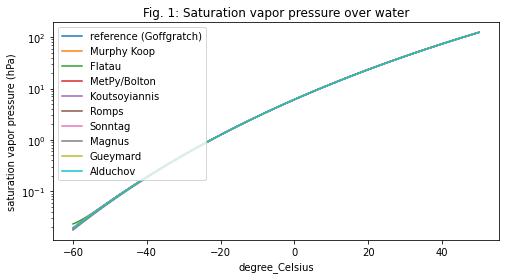

In [ ]:
### SVP log-y plot 

T_all=Ts

fig, ax = plt.subplots(figsize=(8,4))
    
for i,name in enumerate(functions):
    ax.plot(T_all, satvps[i,:], label=name) 
plt.semilogy()
plt.ylabel('saturation vapor pressure (hPa)')
ax.legend(loc='upper left')
ax.set_title('Fig. 1: Saturation vapor pressure over water')
plt.show()

In [ ]:
#### values from lab measurements:
reference_fun = goffgratch46 # choose reference function for the plot

# values from Smithsonian Met tables
smiths_steps=np.arange(-50,50+1,5)
smiths_table=np.array([0.06356,0.1111,0.1891,0.3139,0.5088,0.8070,1.2540,1.9118,2.8627,4.2148,
                 6.1078,8.7192,12.272,17.044,23.373,31.671,42.430,56.236,73.777,95.855,123.4])
smiths_dif=(smiths_table*units.millibar-reference_fun(smiths_steps*units.celsius))/reference_fun(smiths_steps*units.celsius)

# Beltramino (2019) - values from their experiments 1 & 4
Beltramino_steps=np.array([252.248,253.249,254.251,255.251,256.257,257.258,258.253,259.254,260.257,261.253,262.255,
                           263.251,264.247,265.250,266.248,267.246,268.242,269.242,270.250,271.247,272.248,273.251])-273.15
Beltramino_table=np.array([1.1612,1.2650,1.3793,1.5028,1.6335,1.7778,1.9314,2.0954,2.2726,2.4619,2.6666,2.8862,
                           3.1221,3.3764,3.6471,3.9379,4.2455,4.5778,4.9349,5.3147,5.7196,6.1546])
Beltramino_dif=(Beltramino_table*units.millibar-reference_fun(Beltramino_steps*units.celsius))/reference_fun(Beltramino_steps*units.celsius)

# Fukuta and Gramada (2003)
FG_steps=np.arange(-35.,-19,5)
FG_table=np.array([0.288,0.487,0.796,1.25])
FG_dif=(FG_table*units.millibar-reference_fun(FG_steps*units.celsius))/reference_fun(FG_steps*units.celsius)

# IAPWS from Huang (2018)
def Huang(Tin):
  """ equation from Huang (2018), reproduces measured values from the
  International Association for the Properties of Water and Steam (IAWPS) for >0°C"""
  Tc=647.096
  res = 22064000*np.exp(Tc/Tin *(-7.85951783*(1-Tin/Tc)+1.84408259*(1-Tin/Tc)**1.5-11.7866497*(1-Tin/Tc)**3
                                 +22.6807411*(1-Tin/Tc)**3.5-15.9618719*(1-Tin/Tc)**4+1.80122502*(1-Tin/Tc)**7.5))
  return res/100.
Huang_steps=np.arange(273.15,333.15,2.)-273.15
Huang_table=Huang(Huang_steps+273.15)
Huang_dif=(Huang_table*units.millibar-reference_fun(Huang_steps*units.celsius))/reference_fun(Huang_steps*units.celsius)

print('Table 1: Measurement datasets, temperatures (bold numbers) in °C and vapor pressure in mb')
display(pd.DataFrame([smiths_table], columns=smiths_steps,index=['Smithsonian Met Tables']))
display(pd.DataFrame([Beltramino_table], columns=Beltramino_steps,index=['Beltramino (2019)']))
display(pd.DataFrame([FG_table], columns=FG_steps,index=['Fukuta & Gramada (2003)']))
display(pd.DataFrame([Huang_table], columns=Huang_steps,index=['IAPWS from Huang (2018)']))


Table 1: Measurement datasets, temperatures (bold numbers) in °C and vapor pressure in mb


,-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50
Smithsonian Met Tables,0.06356,0.1111,0.1891,0.3139,0.5088,0.807,1.254,1.9118,2.8627,4.2148,6.1078,8.7192,12.272,17.044,23.373,31.671,42.43,56.236,73.777,95.855,123.4


,-20.902,-19.901,-18.899,-17.899,-16.893,-15.892,-14.897,-13.896,-12.893,-11.897,-10.895,-9.899,-8.903,-7.900,-6.902,-5.904,-4.908,-3.908,-2.900,-1.903,-0.902,0.101
Beltramino (2019),1.1612,1.265,1.3793,1.5028,1.6335,1.7778,1.9314,2.0954,2.2726,2.4619,2.6666,2.8862,3.1221,3.3764,3.6471,3.9379,4.2455,4.5778,4.9349,5.3147,5.7196,6.1546


,-35.0,-30.0,-25.0,-20.0
Fukuta & Gramada (2003),0.288,0.487,0.796,1.25


,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,32.0,34.0,36.0,38.0,40.0,42.0,44.0,46.0,48.0,50.0,52.0,54.0,56.0,58.0
IAPWS from Huang (2018),6.112128,7.059689,8.135127,9.353012,10.729239,12.281122,14.027478,15.988723,18.186968,20.646109,23.391937,26.452231,29.856866,33.637915,37.829761,42.469199,47.595552,53.250776,59.479574,66.329506,73.851105,82.097984,91.126955,100.998133,111.775056,123.524789,136.318039,150.229263,165.336773,181.722845


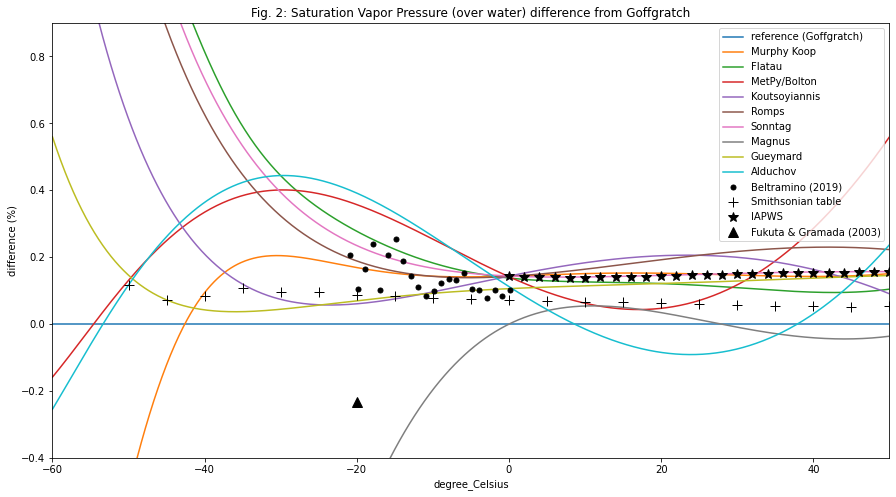

In [ ]:
### plot the relative error (relative to goffgratch)

fig, ax = plt.subplots(figsize=(15,8))
    
for i,name in enumerate(functions):
    ax.plot(Ts, 100*(satvps[i,:]-satvps[0,:])/satvps[0,:], label=name)   # use goffgratch as reference

# plot the values from measurements
ax.plot(Beltramino_steps,100*Beltramino_dif,'k.',label='Beltramino (2019)',markersize=10)
ax.plot(smiths_steps,100*smiths_dif,'k+',label='Smithsonian table',markersize=10)
ax.plot(Huang_steps,100*Huang_dif,'k*',label='IAPWS',markersize=10)
ax.plot(FG_steps,100*FG_dif,'k^',label='Fukuta & Gramada (2003)',markersize=10)
  
ax.legend(loc='upper right')
ax.set_ylim(-0.4,0.9)   # change ylim to see full range of differences
ax.set_xlim(-60.,50.)
plt.ylabel('difference (%)')
ax.set_title('Fig. 2: Saturation Vapor Pressure (over water) difference from Goffgratch')
plt.show()

(0.0, 0.21)

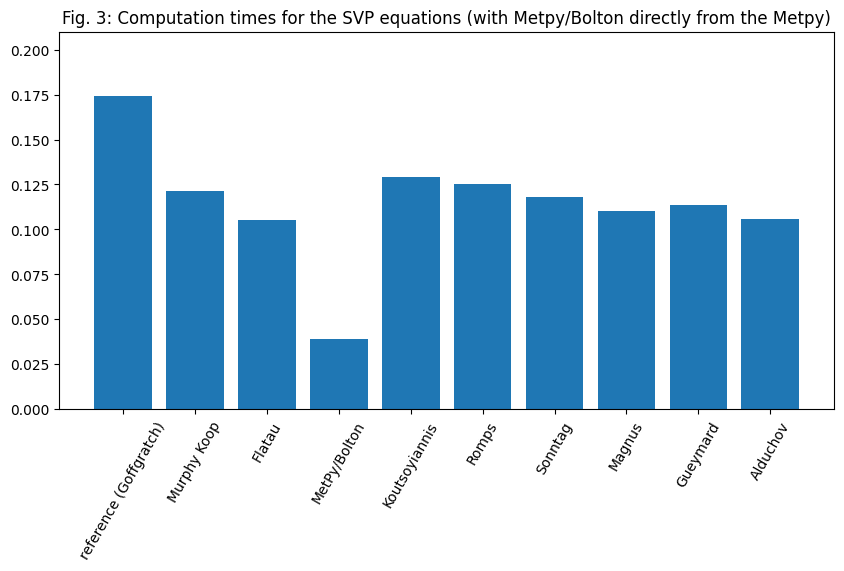

In [ ]:
# computation time

# calculate time using the timeit package
times=np.zeros(len(functions))
names=[]
for i,g in enumerate(functions):
    call = functions[g]['fun'].__name__ + '(Ts)'
    times[i] = timeit.timeit(call, number=100, globals=globals())
    names.append(g)

# make plot
fig, ax = plt.subplots(figsize=(10,5), dpi = 100)
x=np.arange(len(times))
ax.bar(x,times)
ax.set_title('Fig. 3: Computation times for the SVP equations (with Metpy/Bolton directly from the Metpy)')
plt.xticks(x, names,rotation=60)
plt.ylim(0,0.21)

Text(0.5, 1.0, 'RH using saturation vapor pressure over water')

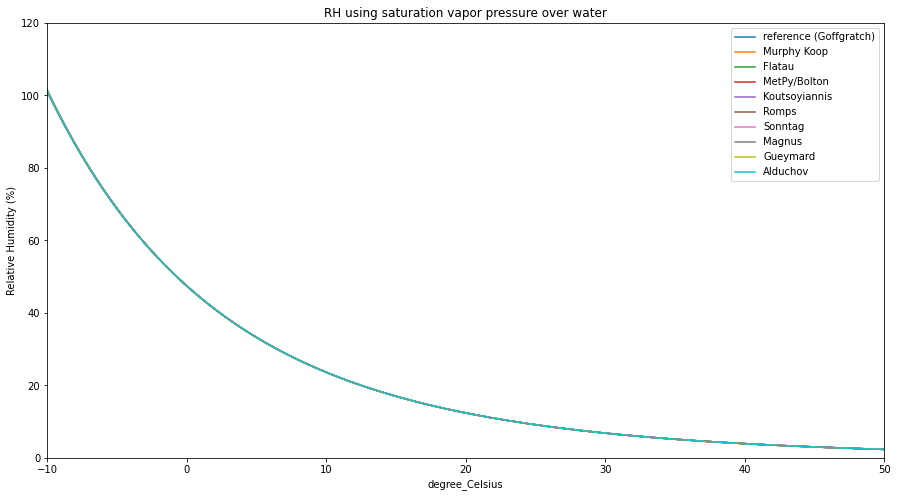

In [ ]:
# Relative Humidity

#vps = 0.02    # hPa     vapor pressure at -60 degrees C
vps = 2.9     # hPa     vapor pressure at -10 degrees C
#vps = 6.1     # hPa     vapor pressure at 0 degrees C

# Calculate Relative Humidity for all saturated vapor pressures
RH = (vps/satvps)*100

# Plot the RH values
fig, ax = plt.subplots(figsize=(15,8))

for k,name in enumerate(functions):
    ax.plot(Ts, RH[k,:], label=name) 
ax.set_xlim(-10.,50.)
ax.set_ylim(0.,120.)
plt.ylabel('Relative Humidity (%)')
ax.legend(loc='upper right')
ax.set_title('RH using saturation vapor pressure over water')



Text(0.5, 1.0, 'Relative Humidity difference from Goffgratch')

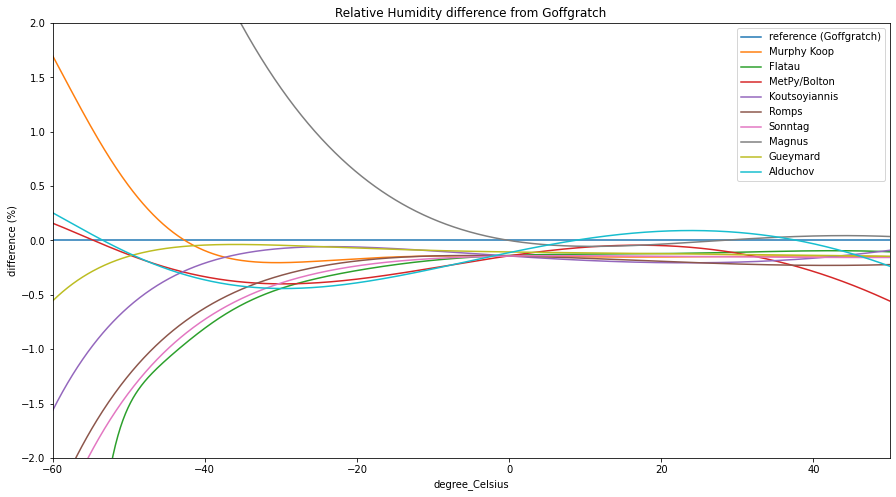

In [ ]:
 # RH Errors
fig, ax = plt.subplots(figsize=(15,8))

for k,name in enumerate(functions):
    ax.plot(Ts, 100*(RH[k,:]-RH[0,:])/RH[0,:], label=name)   # use goffgratch as reference

ax.legend(loc='upper right')
ax.set_ylim(-2,2)
ax.set_xlim(-60.,50.)
plt.ylabel('difference (%)')
ax.set_title('Relative Humidity difference from Goffgratch')

### Saturation vapor pressure over ice

In [ ]:
# -- Lab measurements
# - Bielska 2012
bielska2012_T = np.array((-19.770, -34.775, -49.629, -68.229))* units.celsius
bielska2012_esi = np.array((105.47, 22.886, 4.1338, 0.33936))* units.Pa
bielska2012_error_per = np.array((0.39, 0.41, 0.42, 0.44))

# - Bielska 2013
bielska2013_T = np.array((253.380, 238.375, 223.521, 204.937, 204.918, 204.918, 201.230, 196.757, 192.476, 187.065, 183.205, 179.478, 174.777))* units.K
bielska2013_esi = np.array((1.055 * 1e2, 2.289 * 1e1, 4.134 * 1e0, 3.395 * 1e-1, 3.388 * 1e-1, 3.398 * 1e-1, 1.959 * 1e-1, 9.808 * 1e-2, 4.892 * 1e-2, 1.952 * 1e-2, 9.766 * 1e-3, 4.912 * 1e-3, 1.948 * 1e-3))* units.Pa
bielska2013_error = np.array((4.1 * 1e-1, 8.9 * 1e-2, 1.7 * 1e-2, 1.4 * 1e-3, 1.5 * 1e-3, 1.5 * 1e-3, 8.4 * 1e-4, 4.2 * 1e-4, 2.1 * 1e-4, 8.5 * 1e-5, 4.5 * 1e-5, 2.7 * 1e-5, 1.4 * 1e-5))* units.Pa

# - Marti-Mauersberger 1993
M_Mauersberger1993_T = np.array((173.15, 183.15, 193.15, 203.15, 213.15, 223.15, 233.15, 243.15, 253.15, 263.15, 273.15))* units.K
M_Mauersberger1993_esi = np.array((1.43 * 1e-3, 9.87 * 1e-3, 5.59 * 1e-2, 2.67 * 1e-1, 1.10 * 1e0, 3.99 * 1e0, 1.30 * 1e1, 3.83 * 1e1, 1.04 * 1e2, 2.60 * 1e2, 6.11 * 1e2))* units.Pa

# - International Critical Tables 1928 (from Marti-Mauersberger 1993)
ICT1928_T = np.array((183.15, 193.15, 203.15, 213.15, 223.15, 233.15, 243.15, 253.15, 263.15, 273.15))* units.K
ICT1928_esi = np.array((0.0093, 0.053, 0.259, 1.08, 3.94, 12.9, 38.12, 103, 260.0, 610.5))* units.Pa

# - Smithsonian Meteor. Tables, 6th Rev. Ed. 1958 (from Marti-Mauersberger 1993)
SMT1958_T = np.array((173.15, 183.15, 193.15, 203.15, 213.15, 223.15, 233.15, 243.15, 253.15, 263.15, 273.15))* units.K
SMT1958_esi = np.array((0.001403, 0.009672, 0.05472, 0.2615, 1.08, 3.935, 12.83, 37.98, 103.2, 259.7, 610.7))* units.Pa

# - Landolt-Bornstein 1988 (from Marti-Mauersberger 1993)
L_Bornstein1988_T = np.array((233.15, 243.15, 253.15, 263.15, 273.15))* units.K
L_Bornstein1988_esi = np.array((12.8, 38.0, 103.2, 259.7, 610.6))* units.Pa

# - Handbook of Chemistry and Physics 55th Ed. 1975 (from Marti-Mauersberger 1993)
HCP1975_T = np.array((183.15, 193.15, 203.15, 213.15, 223.15, 233.15, 243.15, 253.15, 263.15, 273.15))* units.K
HCP1975_esi = np.array((0.0093, 0.053, 0.259, 1.08, 3.940, 12.9, 38.12, 103, 260.0, 610.5))* units.Pa

# - Handbook of Chemistry and Physics 72th Ed. 1991 (from Marti-Mauersberger 1993)
HCP1991_T = np.array((193.15, 203.15, 213.15, 223.15, 233.15, 243.15, 253.15, 263.15, 273.15))* units.K
HCP1991_esi = np.array((0.1, 0.3, 1.1, 3.9, 13, 38, 103, 260, 611))* units.Pa

# - Wexler 1977 (from Marti-Mauersberger 1993)
wexler1977_T = np.array((173.15, 183.15, 193.15, 203.15, 213.15, 223.15, 233.15, 243.15, 253.15, 263.15, 273.15))* units.K
wexler1977_esi = np.array((1.406 * 1e-3, 9.688 * 1e-3, 5.481 * 1e-2, 2.619 * 1e-1, 1.082 * 1e0, 3.940 * 1e0, 1.285 * 1e1, 3.802 * 1e1, 1.033 * 1e2, 2.599 * 1e2, 6.112 * 1e2))* units.Pa


In [ ]:
# -- Formulations for vapor pressure over ice
# --
def eval_poly(a, x):
    """Evaluate polynomial at x with coefficients a via Horner's method"""

    p = a[-1]
    for i in range(len(a)-2, -1, -1):
        p = p * x + a[i]
    return p

def flatau6_ice(T):
    """Compute saturation vapor pressure [mb] from temperature [°C] using
    the 6th-order polynomial fit (Table 3) from Flatau et al. (1992)
    Input: temperature [°C]
    Output: pressure [mb]
    """

    a = (6.10952665, 0.501948366, 0.186288989 * 1e-1, 0.403488906 * 1e-3, 0.539797852 * 1e-5, 0.420713632 * 1e-7, 0.147271071 * 1e-9)
    x = T.to('degC').m
    return eval_poly(a, x) * units.millibar

# --
def huang_ice(Tin):
  """ Equation from Huang (2018), reproduces measured values from the
  International Association for the Properties of Water and Steam (IAWPS) for  < 0°C.
  Temperature in [°C] and pressure in [Pa]
    Input: temperature [°C]
    Output: pressure [mb]
    """

  T = Tin.to('degC').m
  res = np.exp(43.494 - (6545.8)/(T + 278))/((T + 868)**2)
  return res/100. * units.millibar

# --
from metpy import constants as mpconsts
def romps_ice(Tin):
    """Compute saturation vapor pressure [mb] from temperature [K] using
    the Romps (2017) formulation
    Input: temperature [°C]
    Output: pressure [mb]
    """
    
    T = Tin.to('degK')

    ptrip = 611.65* units.Pa  # -  triple-point pressure
    Ttrip = 273.16* units.K  # -  triple-point temperature
    E0v = 2.374e6* mpconsts.Lv.units   # -  difference in specific internal energy between water vapor and liquid at the triple point
    E0s = 0.3337e6* mpconsts.Lv.units  # -  difference in specific internal energy between liquid and solid at the triple point
    cvs = 1861* mpconsts.Cv_v.units      # -   specific heat capacity of solid water

    cvv = mpconsts.Cv_v
    Rv = mpconsts.Rv
    cpv = mpconsts.Cp_v

    c1 = (cpv - cvs) / Rv
    c2 = (E0v + E0s - (cvv-cvs)*Ttrip) / Rv

    res = ptrip * (T/Ttrip)**c1 * np.exp(c2 * (1/Ttrip - 1/T))
    return res.to('mbar')


# --
def sonntag90_ice(Tin):
    """Compute saturation vapor pressure [mb] from temperature [K] using
    the Sonntag (1990) formulation
    Input: temperature [°C]
    Output: pressure [mb]
    """

    T=Tin.to('degK').m
    res = np.exp ( -6024.5282 / T 
                 + 24.721994
                 + 1.0613868 * T / 1.0e2
                 - 1.3198825 * T * T / 1.0e5 
                 - 0.49382577 * np.log(T))     
    return res * units.millibar

# --
def murphykoop05_ice(Tin):
    """Compute saturation vapor pressure [Pa] from temperature [K] using
    the Murphy and Koop (2005) formulation
    Input: temperature [°C]
    Output: pressure [mb]
    """

    T = Tin.to('degK').m
    res = np.exp(9.550426 - 5723.265/T + 3.53068*np.log(T) - 0.00728332*T)
    return .01 * res * units.millibar

# --
def martimauersberger93_ice(Tin):
    """Compute saturation vapor pressure [Pa] from temperature [K] using
    the Marti and Mauersberger (1993) formulation
    Input: temperature [°C]
    Output: pressure [mb]
    """

    T = Tin.to('degK').m
    res = 10**((-2663.5 / T) + 12.537)
    return .01 * res * units.millibar

# --
def magnusteten67_ice(Tin):
    """Compute saturation vapor pressure [mb] from temperature [K] using
    the Murray (1967) formulation
    Input: temperature [°C]
    Output: pressure [mb]
    """

    T = Tin.to('degK').m
    res = 6.1078 * np.exp(21.8745584 * ((T - 273.16) / (T - 7.66)))
    return res * units.millibar

# --
def goffgratch84_ice(Tin):
    """Compute saturation vapor pressure [mb] from temperature [K] based on Smithsonian Tables (1984)
    Input: temperature [°C]
    Output: pressure [mb]
    """

    T = Tin.to('degK').m
    res = 10**(-9.09718* (273.16/T - 1) 
                   - 3.56654 * np.log10(273.16/ T)
                   + 0.876793 * (1 - T/ 273.16)
                   + np.log10(6.1071)) 
    return res * units.millibar

# --
def hylandhexler83_ice(Tin):
    """Compute saturation vapor pressure [mb] from temperature [K] using
    the Hyland and Wexler (1983) formulation
    Input: temperature [°C]
    Output: pressure [mb]
    """

    T = Tin.to('degK').m
    res = np.exp(-0.56745359e4 / T
                 + 0.63925247e1
                 - 0.96778430e-2 * T
                 + 0.62215701e-6 * T**2
                 + 0.20747825e-8 * T**3
                 - 0.94840240e-12 * T**4
                 + 0.41635019e1 * np.log(T))
    return .01 * res * units.millibar

# --
def buck_ice(Tin, year=1996):
    """Compute saturation vapor pressure [mb] from temperature [°C] using
    the Buck (1996) or (1981) formulation
    Input: temperature [°C]
    Output: pressure [mb]
    """

    T = Tin.to('degC').m
    if year == 1996:
      res = 6.1115 * np.exp(((23.036 - (T / 333.7)) * T) / (279.82 + T))

    if year == 1981:
      res = 6.1115 * np.exp((22.452 * T) / (272.55 + T) )

    return res * units.millibar

# --
def cimo_ice(Tin):
    """Compute saturation vapor pressure [mb] from temperature [°C] using
    the Guide to Meteorological Instruments and Methods of Observation (CIMO Guide)
    (WMO, 2018) formulation
    Input: temperature [°C]
    Output: pressure [mb]
    """

    T = Tin.to('degC').m
    res = 6.112 * np.exp((22.46 * T)/(272.62 + T))
    return res * units.millibar

In [ ]:
# -- Functions
functions_ice = {'Flatau': {'fun': flatau6_ice, 'ref': False, 'range': np.linspace(-50,0,1000) * units.celsius},
             'Huang': {'fun': huang_ice, 'ref': False, 'range': np.linspace(-100,0,1000) * units.celsius},
             'Romps': {'fun': romps_ice, 'ref': False, 'range': np.linspace(-93,0,1000) * units.celsius},
             'Sonntag': {'fun': sonntag90_ice, 'ref': False, 'range': np.linspace(-100,0,1000) * units.celsius},
             'Murphy-Koop': {'fun': murphykoop05_ice, 'ref': False, 'range': np.linspace(-163,0,1000) * units.celsius},
             'Marti-Mauersberger': {'fun': martimauersberger93_ice, 'ref': False, 'range': np.linspace(-100,-20,1000) * units.celsius},
             'Magnus Teten': {'fun': magnusteten67_ice, 'ref': False, 'range': np.linspace(-50,0,1000) * units.celsius},
             'Goff-Gratch': {'fun': goffgratch84_ice, 'ref': False, 'range': np.linspace(-100,0,1000) * units.celsius},
             'Hyland-Hexler': {'fun': hylandhexler83_ice, 'ref': False, 'range': np.linspace(-100,0,1000) * units.celsius},
             'Buck': {'fun': buck_ice, 'ref': False, 'range': np.linspace(-80,0,1000) * units.celsius},
             'CIMO': {'fun': cimo_ice, 'ref': False, 'range': np.linspace(-65,0,1000) * units.celsius}}

Text(0.5, 1.0, 'Saturation vapor pressure over water and ice')

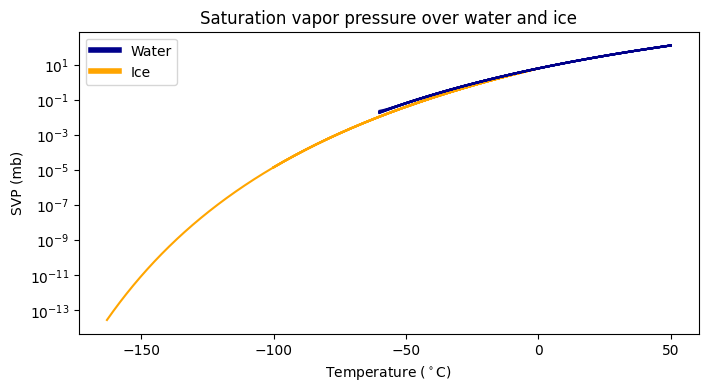

In [ ]:
### SVP log-y plot 

fig, ax = plt.subplots(figsize=(8,4), dpi = 100)
    
for i,name in enumerate(functions_ice):
    svp = functions_ice[name]['fun'](functions_ice[name]['range'])
    ax.plot(functions_ice[name]['range'], svp, label = name, color = 'orange') 

T_all=Ts
for i,name in enumerate(functions):
    ax.plot(T_all, satvps[i,:], label=name, color = 'darkblue') 

plt.semilogy()

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='darkblue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
ax.legend(custom_lines, ['Water', 'Ice'])

plt.ylabel('SVP (mb)')
plt.xlabel('Temperature ($^\circ$C)')
plt.title('Saturation vapor pressure over water and ice')

Text(0.5, 1.0, 'Fig. 4: Saturation vapor pressure over ice')

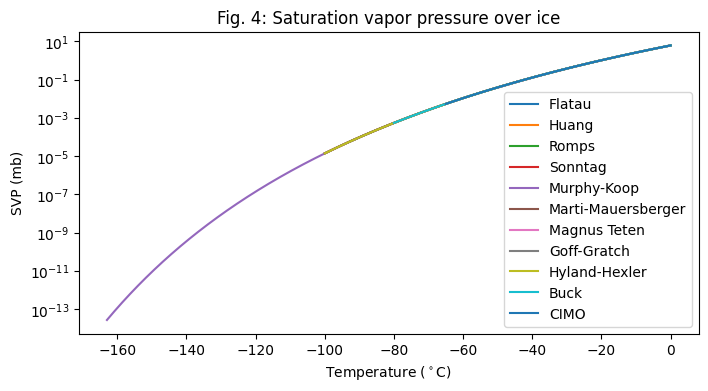

In [ ]:
### SVP log-y plot
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)
    
for i,name in enumerate(functions_ice):
    svp = functions_ice[name]['fun'](functions_ice[name]['range'])
    ax.plot(functions_ice[name]['range'], svp, label = name) 

plt.semilogy()
ax.legend()
# ax.legend(loc='upper left')

plt.ylabel('SVP (mb)')
plt.xlabel('Temperature ($^\circ$C)')
plt.title('Fig. 4: Saturation vapor pressure over ice')

In [ ]:
# -- Values from lab experiments:
reference_fun = goffgratch84_ice # choose reference function for the plot

bielska2012_diff = (bielska2012_esi.to('millibar') - reference_fun(bielska2012_T))/reference_fun(bielska2012_T)
bielska2013_diff = (bielska2013_esi.to('millibar') - reference_fun(bielska2013_T))/reference_fun(bielska2013_T)
M_Mauersberger1993_diff = (M_Mauersberger1993_esi.to('millibar') - reference_fun(M_Mauersberger1993_T))/reference_fun(M_Mauersberger1993_T)

# ICT1928_diff = (ICT1928_esi.to('millibar') - reference_fun(ICT1928_T))/reference_fun(ICT1928_T)
SMT1958_diff = (SMT1958_esi.to('millibar') - reference_fun(SMT1958_T))/reference_fun(SMT1958_T)
# L_Bornstein1988_diff = (L_Bornstein1988_esi.to('millibar') - reference_fun(L_Bornstein1988_T))/reference_fun(L_Bornstein1988_T)
# HCP1975_diff = (HCP1975_esi.to('millibar') - reference_fun(HCP1975_T))/reference_fun(HCP1975_T)
# HCP1991_diff = (HCP1991_esi.to('millibar') - reference_fun(HCP1991_T))/reference_fun(HCP1991_T)
wexler1977_diff = (wexler1977_esi.to('millibar') - reference_fun(wexler1977_T))/reference_fun(wexler1977_T)

Text(0.5, 1.0, 'Fig. 5: Saturation Vapor Pressure over ice difference from Goffgratch')

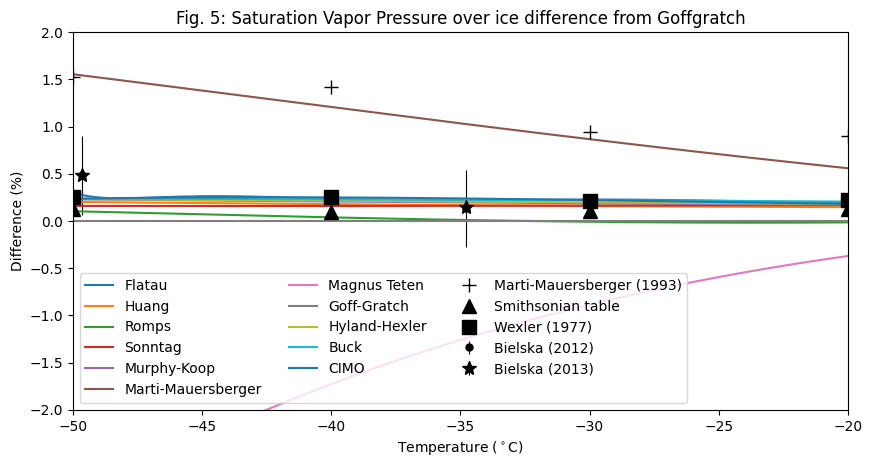

In [ ]:
### plot the relative error (relative to goffgratch)

fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)
# - choosing range where all formulation are valid
T_all = np.linspace(-50,-20,300) * units.celsius
# - functions
svp_ref = functions_ice['Goff-Gratch']['fun'](T_all)    
for i,name in enumerate(functions_ice):
    svp = functions_ice[name]['fun'](T_all)
    ax.plot(T_all, 100*(svp - svp_ref)/svp_ref, label = name)   # use goffgratch as reference

# - measurements
plt.errorbar(bielska2012_T, 100*bielska2012_diff, yerr= bielska2012_error_per, marker = '.', xerr = None, ls='none', color = 'black', ecolor = 'black', elinewidth = 0.8, label='Bielska (2012)',markersize=10)
plt.errorbar(bielska2013_T, 100*bielska2013_diff, yerr= bielska2013_error/bielska2013_esi, marker = '*', xerr = None, ls='none', color = 'black', ecolor = 'black', elinewidth = 0.8, label='Bielska (2013)',markersize=10)
ax.plot(M_Mauersberger1993_T,100*M_Mauersberger1993_diff,'k+',label='Marti-Mauersberger (1993)',markersize=10)
ax.plot(SMT1958_T,100*SMT1958_diff,'k^',label='Smithsonian table',markersize=10)
ax.plot(wexler1977_T,100*wexler1977_diff,'s', color = 'black',label = 'Wexler (1977)', markersize=10)

# ax.plot(ICT1928_T,100*ICT1928_diff,'k*',label='ICT (1928)',markersize=10)
# ax.plot(L_Bornstein1988_T,100*L_Bornstein1988_diff,'k^',label='Landolt-Bornstein (1988)',markersize=10)
# ax.plot(HCP1975_T,100*HCP1975_diff,'k^',label='HCP (1975)',markersize=10)
# ax.plot(HCP1991_T,100*HCP1991_diff,'k^',label='HCP (1991)',markersize=10)

plt.legend(fontsize = 10, loc='lower left', ncol = 3)
plt.xlim(-50.,-20.)
plt.ylim(-2,2)
plt.ylabel('Difference (%)')
plt.xlabel('Temperature ($^\circ$C)')
plt.title('Fig. 5: Saturation Vapor Pressure over ice difference from Goffgratch')

Text(0.5, 1.0, 'Fig. 6: Saturation Vapor Pressure over ice difference from the mean')

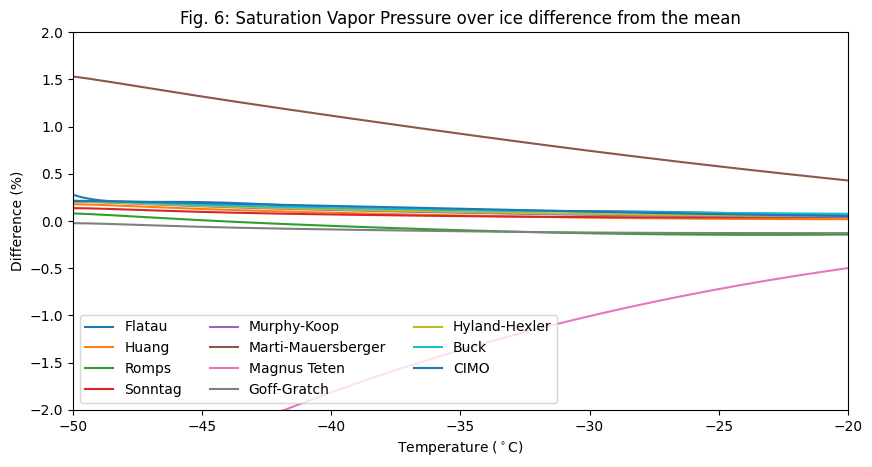

In [ ]:
### plot the relative error (relative to the mean)
svp = np.zeros(300) 
for i,name in enumerate(functions_ice):
    svp = svp + functions_ice[name]['fun'](T_all)
svp_ref = svp/11

# - the relative error (relative to the mean)
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)

# - choosing range where all formulation are valid
T_all = np.linspace(-50,-20,300) * units.celsius
# - functions 
for i,name in enumerate(functions_ice):
    svp = functions_ice[name]['fun'](T_all)
    ax.plot(T_all, 100*(svp - svp_ref)/svp_ref, label = name)   # use mean as reference

plt.legend(fontsize = 10, loc='lower left', ncol = 3)
plt.xlim(-50.,-20.)
plt.ylim(-2,2)
plt.ylabel('Difference (%)')
plt.xlabel('Temperature ($^\circ$C)')
plt.title('Fig. 6: Saturation Vapor Pressure over ice difference from the mean')

In [ ]:
# -- Functions
functions_ice = {'Huang': {'fun': huang_ice, 'ref': False, 'range': np.linspace(-100,0,1000) * units.celsius},
             'Romps': {'fun': romps_ice, 'ref': False, 'range': np.linspace(-93,0,1000) * units.celsius},
             'Sonntag': {'fun': sonntag90_ice, 'ref': False, 'range': np.linspace(-100,0,1000) * units.celsius},
             'Murphy-Koop': {'fun': murphykoop05_ice, 'ref': False, 'range': np.linspace(-163,0,1000) * units.celsius},
             'Goff-Gratch': {'fun': goffgratch84_ice, 'ref': False, 'range': np.linspace(-100,0,1000) * units.celsius},
             'Hyland-Hexler': {'fun': hylandhexler83_ice, 'ref': False, 'range': np.linspace(-100,0,1000) * units.celsius}}

Text(0.5, 1.0, 'Fig. 7: Saturation Vapor Pressure over ice difference from Goffgratch')

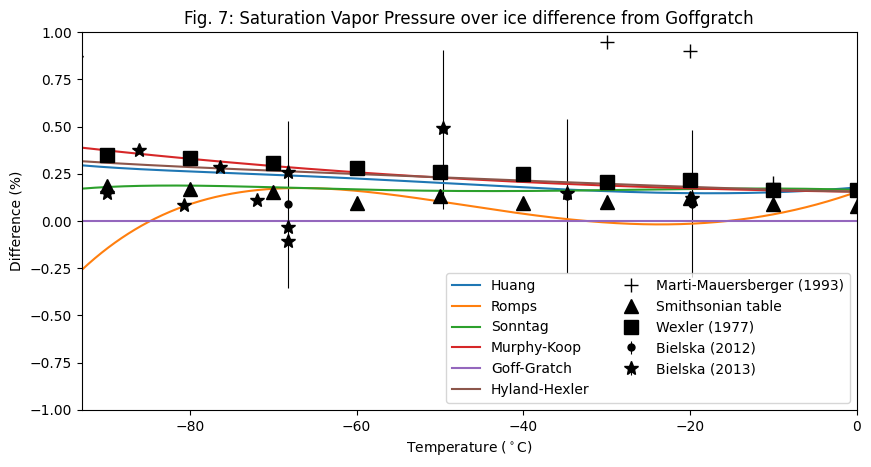

In [ ]:
### plot the relative error (relative to goffgratch)

fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)
# - choosing broader range for ice
T_all = np.linspace(-93,0,930) * units.celsius
# - functions
svp_ref = functions_ice['Goff-Gratch']['fun'](T_all)    
for i,name in enumerate(functions_ice):
    svp = functions_ice[name]['fun'](T_all)
    ax.plot(T_all, 100*(svp - svp_ref)/svp_ref, label = name)   # use goffgratch as reference

# - measurements
plt.errorbar(bielska2012_T, 100*bielska2012_diff, yerr= bielska2012_error_per, marker = '.', xerr = None, ls='none', color = 'black', ecolor = 'black', elinewidth = 0.8, label='Bielska (2012)',markersize=10)
plt.errorbar(bielska2013_T, 100*bielska2013_diff, yerr= bielska2013_error/bielska2013_esi, marker = '*', xerr = None, ls='none', color = 'black', ecolor = 'black', elinewidth = 0.8, label='Bielska (2013)',markersize=10)
ax.plot(M_Mauersberger1993_T,100*M_Mauersberger1993_diff,'k+',label='Marti-Mauersberger (1993)',markersize=10)
ax.plot(SMT1958_T,100*SMT1958_diff,'k^',label='Smithsonian table',markersize=10)
ax.plot(wexler1977_T,100*wexler1977_diff,'s', color = 'black',label = 'Wexler (1977)', markersize=10)

plt.legend(fontsize = 10, loc='lower right', ncol = 2)
plt.xlim(-93.,0.)
plt.ylim(-1,1)
plt.ylabel('Difference (%)')
plt.xlabel('Temperature ($^\circ$C)')
plt.title('Fig. 7: Saturation Vapor Pressure over ice difference from Goffgratch')

(0.0, 0.21)

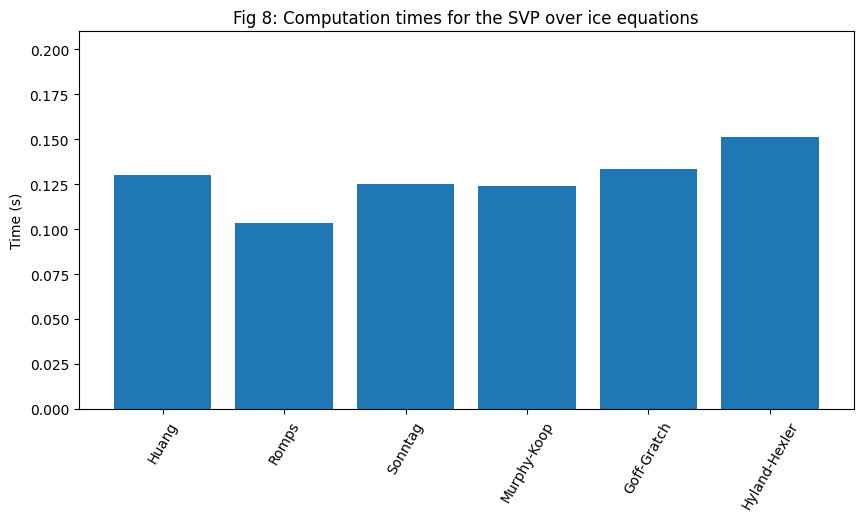

In [ ]:
# -- Computation time
times=np.zeros(len(functions_ice))
names=[]
for i,g in enumerate(functions_ice):
    call = functions_ice[g]['fun'].__name__ + '(Ts)'
    times[i] = timeit.timeit(call, number=100, globals=globals())
    names.append(g)

fig, ax = plt.subplots(figsize=(10,5), dpi = 100)
x = np.arange(len(times))
plt.bar(x,times)
plt.xticks(x, names,rotation=60)
plt.title('Fig 8: Computation times for the SVP over ice equations')
plt.ylabel('Time (s)')
plt.ylim(0,0.21)

### Practical application example calculating LCL and LDL

In [ ]:
def lcl(TTT, TTTd, function):
  """
  The lifting condensation level LCL is the height at which an air parcel would saturate if lifted adiabatically.
    Input: TTT and TTTd temperature and dew point [°C]
    Output: temperature [K], pressure [mb] and height [m] at LCL
  """

  e = function(TTTd).to('mbar').m
  es = function(TTT).to('mbar').m
  rh = e/es

  p = 1000 # mb
  z = 0 #m
  qv = (0.622*e)/(p-e)


  Ra = 287  # specific gas constant for dry air J Kg-1 K-1
  cva = 719 # specific heat capacity at constant volume for dry air J Kg-1 K-1
  cpa = cva + Ra # specific heat capacity at constant volume for dry air J Kg-1 K-1
  Rv = 461 # specific gas constant for water vapor J Kg-1 K-1
  cvv = 1418 # specific heat capacity of water vapor at constant volume J Kg-1 K-1
  cpv = cvv + Rv # specific heat capacity of water vapor at constant pressure J Kg-1 K-1
  E0v = 2.3740e6 # difference in specific internal energy between water vapor and liquid at the triple point J kg-1
  cvl = 4119 # specific heat capacity of liquid water J Kg-1 K-1
  Ttrip = 273.16 # triple-point temperature K
  g = 9.81 # gravitational acceleration m s-2

  TTT = TTT.to('degK').m

  cpm = (1-qv)*cpa + qv*cpv
  Rm = (1-qv)*Ra + qv*Rv 
  a = (cpm/Rm) + ((cvl+cpv)/Rv)
  b = - (E0v - (cvv - cvl)*Ttrip)/(Rv*TTT)
  c = b/a
  d = ((rh)**(1/a))*c*np.exp(c)


  T_lcl = c*TTT/sp.special.lambertw(d,-1).real
  p_lcl = p*((T_lcl/TTT)**(cpm/Rm))

  z_lcl = z + (cpm/g)*(TTT - T_lcl)

  return T_lcl, p_lcl, z_lcl

In [ ]:
def ldl(TTT, TTTd, function):
  """
  The lifting deposition level LDL is the height above which the formation of an ice cloud is possible through heterogeneous deposition nucleation or immersion freezing.
  Input: TTT and TTTd temperature and dew point [°C]
  Output: temperature [K], pressure [mb] and height [m] at LDL
  """

  e = saturation_vapor_pressure(TTTd).to('mbar').m  # - Bolton SVP over water
  es = function(TTT).to('mbar').m
  rh = e/es

  p = 1000 # mb
  z = 0 #m
  qv = (0.622*e)/(p-e)


  Ra = 287  # specific gas constant for dry air J Kg-1 K-1
  cva = 719 # specific heat capacity at constant volume for dry air J Kg-1 K-1
  cpa = cva + Ra # specific heat capacity at constant volume for dry air J Kg-1 K-1
  Rv = 461 # specific gas constant for water vapor J Kg-1 K-1
  cvv = 1418 # specific heat capacity of water vapor at constant volume J Kg-1 K-1
  cpv = cvv + Rv # specific heat capacity of water vapor at constant pressure J Kg-1 K-1
  E0v = 2.3740e6 # difference in specific internal energy between water vapor and liquid at the triple point J kg-1
  cvl = 4119 # specific heat capacity of liquid water J Kg-1 K-1
  Ttrip = 273.16 # triple-point temperature K
  g = 9.81 # gravitational acceleration m s-2
  E0s = 0.3337e6  # difference in specific internal energy between liquid and solid at the triple point J kg-1
  cvs = 1861  # specific heat capacity of solid water J Kg-1 K-1

  TTT = TTT.to('degK').m

  cpm = (1-qv)*cpa + qv*cpv
  Rm = (1-qv)*Ra + qv*Rv 
  a = (cpm/Rm) + ((cvs-cpv)/Rv)
  b = - (E0v + E0s - (cvv - cvs)*Ttrip)/(Rv*TTT)
  c = b/a
  d = ((rh)**(1/a))*c*np.exp(c)


  T_ldl = c*TTT/sp.special.lambertw(d,-1).real
  p_ldl = p*((T_ldl/TTT)**(cpm/Rm))

  z_ldl = z + (cpm/g)*(TTT - T_ldl)

  return T_ldl, p_ldl, z_ldl

In [ ]:
# - Initial temperatures
TTT = np.arange(-10,1,5) * units.celsius
# - Dew point temperatures -2,-5,-10 from initial temperatures for different RH calculations
TTTd1 = np.arange(-12,-1,5) * units.celsius
TTTd2 = np.arange(-15,-4,5) * units.celsius
TTTd3 = np.arange(-20,-9,5) * units.celsius

Text(0.5, 1.0, 'Td = T - 10 $^\\circ$ C')

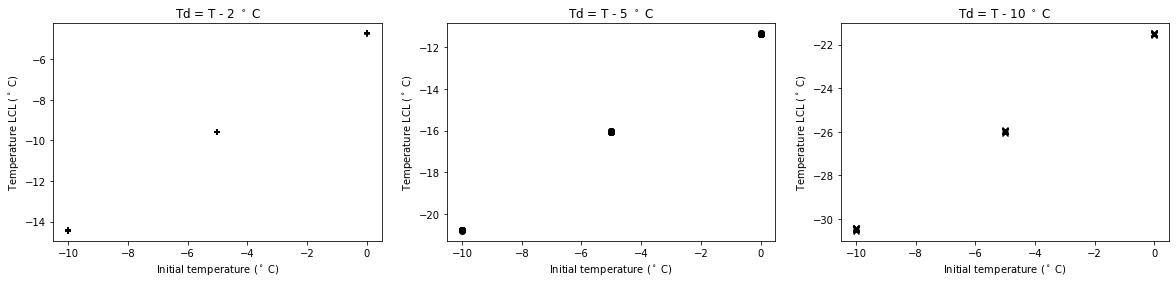

In [ ]:
# LCL
fig = plt.figure(figsize=(20, 4))

ax = fig.add_subplot(131)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd1, functions[name]['fun'])[0]*units.K).to('degC')
    plt.scatter(TTT, t_lcl, color = 'black', marker = '+') 

plt.ylabel('Temperature LCL ($^\circ$ C)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 2 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(132)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd2, functions[name]['fun'])[0]*units.K).to('degC')
    plt.scatter(TTT, t_lcl, color = 'black', marker = 'o') 

plt.ylabel('Temperature LCL ($^\circ$ C)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 5 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(133)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd3, functions[name]['fun'])[0]*units.K).to('degC')
    plt.scatter(TTT, t_lcl, color = 'black', marker = 'x') 

plt.ylabel('Temperature LCL ($^\circ$ C)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 10 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

Text(0.5, 1.0, 'Td = T - 10 $^\\circ$ C')

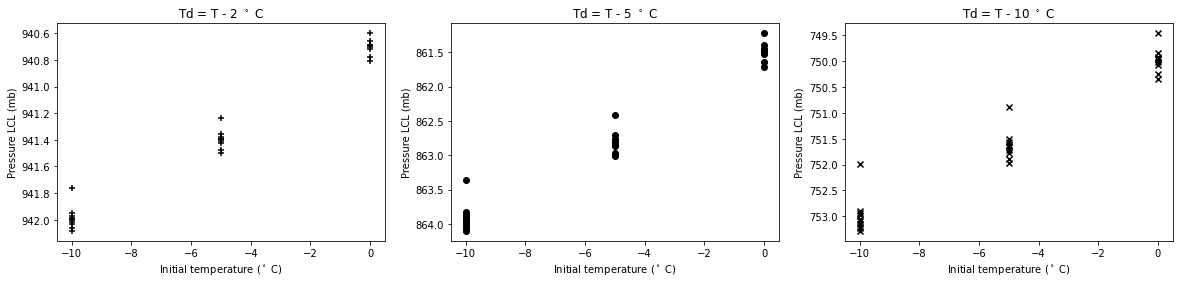

In [ ]:
# LCL
fig = plt.figure(figsize=(20, 4))

ax = fig.add_subplot(131)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd1, functions[name]['fun'])[1]*units.mbar)
    plt.scatter(TTT, t_lcl, color = 'black', marker = '+') 

plt.gca().invert_yaxis()
plt.ylabel('Pressure LCL (mb)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 2 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(132)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd2, functions[name]['fun'])[1]*units.mbar)
    plt.scatter(TTT, t_lcl, color = 'black', marker = 'o') 

plt.gca().invert_yaxis()
plt.ylabel('Pressure LCL (mb)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 5 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(133)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd3, functions[name]['fun'])[1]*units.mbar)
    plt.scatter(TTT, t_lcl, color = 'black', marker = 'x') 

plt.gca().invert_yaxis()
plt.ylabel('Pressure LCL (mb)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 10 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

Text(0.5, 1.0, 'Td = T - 10 $^\\circ$ C')

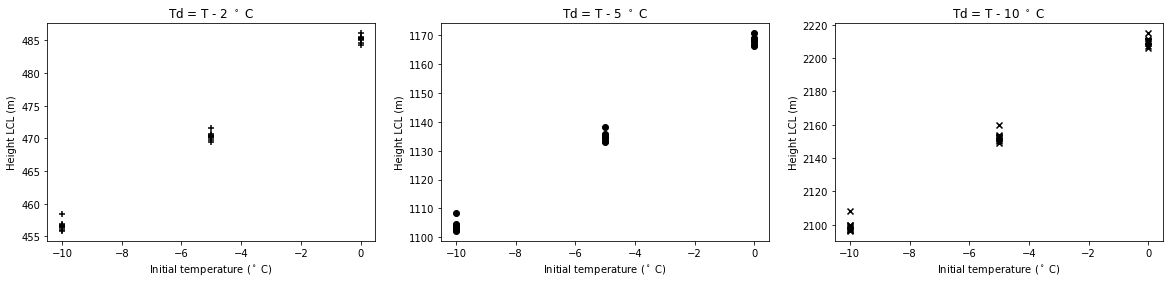

In [ ]:
# LCL
fig = plt.figure(figsize=(20, 4))

ax = fig.add_subplot(131)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd1, functions[name]['fun'])[2]*units.m)
    plt.scatter(TTT, t_lcl, color = 'black', marker = '+') 

plt.ylabel('Height LCL (m)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 2 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(132)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd2, functions[name]['fun'])[2]*units.m)
    plt.scatter(TTT, t_lcl, color = 'black', marker = 'o') 

plt.ylabel('Height LCL (m)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 5 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(133)
for i,name in enumerate(functions):
    t_lcl = (lcl(TTT, TTTd3, functions[name]['fun'])[2]*units.m)
    plt.scatter(TTT, t_lcl, color = 'black', marker = 'x') 

plt.ylabel('Height LCL (m)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 10 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

(-11.0, 1.0)

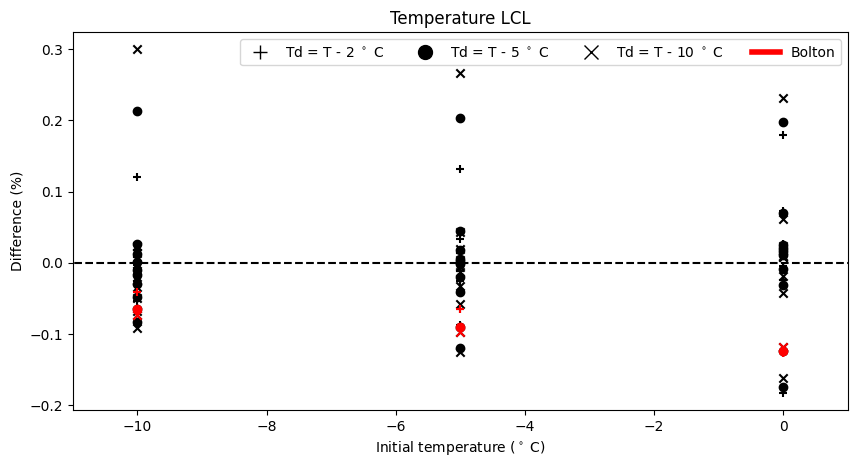

In [ ]:
# LCL
t_lcl1 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl1 = t_lcl1 + (lcl(TTT, TTTd1, functions[name]['fun'])[0]*units.K).to('degC').m
t_lcl1_ref = t_lcl1/len(functions)
t_lcl1_ref

t_lcl2 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl2 = t_lcl2 + (lcl(TTT, TTTd2, functions[name]['fun'])[0]*units.K).to('degC').m
t_lcl2_ref = t_lcl2/len(functions)
t_lcl2_ref

t_lcl3 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl3 = t_lcl3 + (lcl(TTT, TTTd3, functions[name]['fun'])[0]*units.K).to('degC').m
t_lcl3_ref = t_lcl3/len(functions)
t_lcl3_ref

# - the relative error (relative to the mean)
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)

# - choosing range where all formulation are valid

# - functions 
for i,name in enumerate(functions):
    t_lcl1 = (lcl(TTT, TTTd1, functions[name]['fun'])[0]*units.K).to('degC').m
    plt.scatter(TTT, 100*(t_lcl1 - t_lcl1_ref)/t_lcl1_ref, label = name, color='black', marker = '+') 
    t_lcl2 = (lcl(TTT, TTTd2, functions[name]['fun'])[0]*units.K).to('degC').m  
    plt.scatter(TTT, 100*(t_lcl2 - t_lcl2_ref)/t_lcl2_ref, label = name, color='black',marker = 'o')
    t_lcl3 = (lcl(TTT, TTTd3, functions[name]['fun'])[0]*units.K).to('degC').m
    plt.scatter(TTT, 100*(t_lcl3 - t_lcl3_ref)/t_lcl3_ref, label = name, color='black',marker = 'x')


# - MetPy/Bolton in red
t_lcl1 = (lcl(TTT, TTTd1, functions['MetPy/Bolton']['fun'])[0]*units.K).to('degC').m
plt.scatter(TTT, 100*(t_lcl1 - t_lcl1_ref)/t_lcl1_ref, color = 'red', marker = '+') 
t_lcl2 = (lcl(TTT, TTTd2, functions['MetPy/Bolton']['fun'])[0]*units.K).to('degC').m  
plt.scatter(TTT, 100*(t_lcl2 - t_lcl2_ref)/t_lcl2_ref, color = 'red', marker = 'o')
t_lcl3 = (lcl(TTT, TTTd3, functions['MetPy/Bolton']['fun'])[0]*units.K).to('degC').m
plt.scatter(TTT, 100*(t_lcl3 - t_lcl3_ref)/t_lcl3_ref, color = 'red', marker = 'x')


import matplotlib.lines as mlines
plus = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=10, label='Td = T - 2 $^\circ$ C')
circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Td = T - 5 $^\circ$ C')
cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=10, label='Td = T - 10 $^\circ$ C')
b = mlines.Line2D([], [], color='red', linewidth='4',
                          markersize=10, label='Bolton')

plt.legend(handles=[plus,circle,cross,b],ncol = 4)

plt.ylabel('Difference (%)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Temperature LCL')
plt.hlines(0,-12,2, linestyle = 'dashed')
plt.xlim(-11,1)

(-11.0, 1.0)

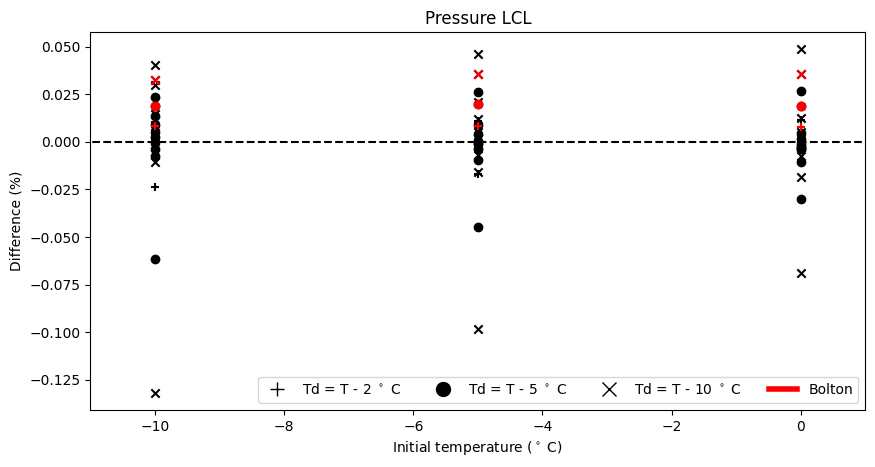

In [ ]:
# LCL
t_lcl1 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl1 = t_lcl1 + (lcl(TTT, TTTd1, functions[name]['fun'])[1]*units.mbar).m
t_lcl1_ref = t_lcl1/len(functions)
t_lcl1_ref

t_lcl2 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl2 = t_lcl2 + (lcl(TTT, TTTd2, functions[name]['fun'])[1]*units.mbar).m
t_lcl2_ref = t_lcl2/len(functions)
t_lcl2_ref

t_lcl3 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl3 = t_lcl3 + (lcl(TTT, TTTd3, functions[name]['fun'])[1]*units.mbar).m
t_lcl3_ref = t_lcl3/len(functions)
t_lcl3_ref

# - the relative error (relative to the mean)
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)

# - choosing range where all formulation are valid

# - functions 
for i,name in enumerate(functions):
    t_lcl1 = (lcl(TTT, TTTd1, functions[name]['fun'])[1]*units.mbar).m
    plt.scatter(TTT, 100*(t_lcl1 - t_lcl1_ref)/t_lcl1_ref, label = name, color = 'black', marker = '+') 
    t_lcl2 = (lcl(TTT, TTTd2, functions[name]['fun'])[1]*units.mbar).m  
    plt.scatter(TTT, 100*(t_lcl2 - t_lcl2_ref)/t_lcl2_ref, label = name, color = 'black', marker = 'o')
    t_lcl3 = (lcl(TTT, TTTd3, functions[name]['fun'])[1]*units.mbar).m
    plt.scatter(TTT, 100*(t_lcl3 - t_lcl3_ref)/t_lcl3_ref, label = name, color = 'black', marker = 'x')

# - MetPy/Bolton in red
t_lcl1 = (lcl(TTT, TTTd1, functions['MetPy/Bolton']['fun'])[1]*units.mbar).m
plt.scatter(TTT, 100*(t_lcl1 - t_lcl1_ref)/t_lcl1_ref,  color = 'red',marker = '+') 
t_lcl2 = (lcl(TTT, TTTd2, functions['MetPy/Bolton']['fun'])[1]*units.mbar).m  
plt.scatter(TTT, 100*(t_lcl2 - t_lcl2_ref)/t_lcl2_ref, color = 'red', marker = 'o')
t_lcl3 = (lcl(TTT, TTTd3, functions['MetPy/Bolton']['fun'])[1]*units.mbar).m
plt.scatter(TTT, 100*(t_lcl3 - t_lcl3_ref)/t_lcl3_ref, color = 'red', marker = 'x')


import matplotlib.lines as mlines
plus = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=10, label='Td = T - 2 $^\circ$ C')
circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Td = T - 5 $^\circ$ C')
cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=10, label='Td = T - 10 $^\circ$ C')
b = mlines.Line2D([], [], color='red', linewidth='4',
                          markersize=10, label='Bolton')

plt.legend(handles=[plus,circle,cross,b],ncol = 4)

plt.ylabel('Difference (%)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Pressure LCL')
plt.hlines(0,-12,2, linestyle = 'dashed')
plt.xlim(-11,1)
# plt.ylim(-3,0)

(-11.0, 1.0)

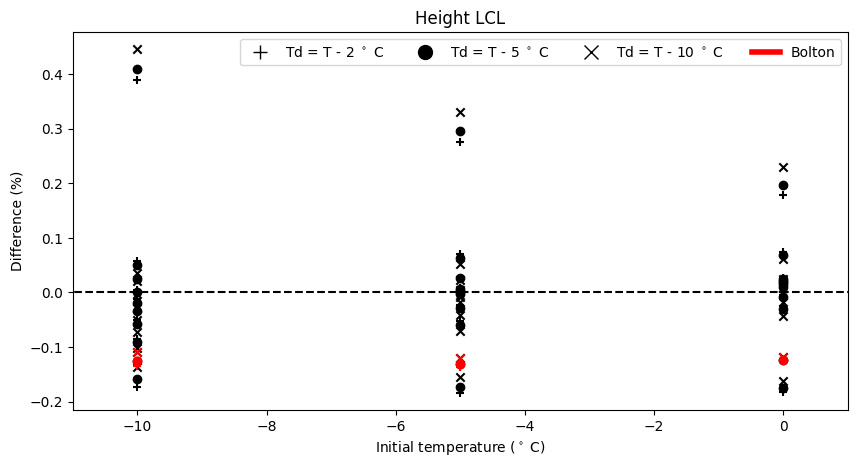

In [ ]:
# LCL
t_lcl1 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl1 = t_lcl1 + (lcl(TTT, TTTd1, functions[name]['fun'])[2]*units.m).m
t_lcl1_ref = t_lcl1/len(functions)
t_lcl1_ref

t_lcl2 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl2 = t_lcl2 + (lcl(TTT, TTTd2, functions[name]['fun'])[2]*units.m).m
t_lcl2_ref = t_lcl2/len(functions)
t_lcl2_ref

t_lcl3 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_lcl3 = t_lcl3 + (lcl(TTT, TTTd3, functions[name]['fun'])[2]*units.m).m
t_lcl3_ref = t_lcl3/len(functions)
t_lcl3_ref

# - the relative error (relative to the mean)
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)

# - choosing range where all formulation are valid

# - functions 
for i,name in enumerate(functions):
    t_lcl1 = (lcl(TTT, TTTd1, functions[name]['fun'])[2]*units.m).m
    plt.scatter(TTT, 100*(t_lcl1 - t_lcl1_ref)/t_lcl1_ref, label = name, color='black', marker = '+') 
    t_lcl2 = (lcl(TTT, TTTd2, functions[name]['fun'])[2]*units.m).m  
    plt.scatter(TTT, 100*(t_lcl2 - t_lcl2_ref)/t_lcl2_ref, label = name, color='black',marker = 'o')
    t_lcl3 = (lcl(TTT, TTTd3, functions[name]['fun'])[2]*units.m).m
    plt.scatter(TTT, 100*(t_lcl3 - t_lcl3_ref)/t_lcl3_ref, label = name, color='black',marker = 'x')

# - MetPy/Bolton in red
t_lcl1 = (lcl(TTT, TTTd1, functions['MetPy/Bolton']['fun'])[2]*units.m).m
plt.scatter(TTT, 100*(t_lcl1 - t_lcl1_ref)/t_lcl1_ref, color = 'red', marker = '+') 
t_lcl2 = (lcl(TTT, TTTd2, functions['MetPy/Bolton']['fun'])[2]*units.m).m  
plt.scatter(TTT, 100*(t_lcl2 - t_lcl2_ref)/t_lcl2_ref, color = 'red', marker = 'o')
t_lcl3 = (lcl(TTT, TTTd3, functions['MetPy/Bolton']['fun'])[2]*units.m).m
plt.scatter(TTT, 100*(t_lcl3 - t_lcl3_ref)/t_lcl3_ref, color = 'red', marker = 'x')


import matplotlib.lines as mlines
plus = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=10, label='Td = T - 2 $^\circ$ C')
circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Td = T - 5 $^\circ$ C')
cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=10, label='Td = T - 10 $^\circ$ C')
b = mlines.Line2D([], [], color='red', linewidth='4',
                          markersize=10, label='Bolton')

plt.legend(handles=[plus,circle,cross,b],ncol = 4)

plt.ylabel('Difference (%)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Height LCL')
plt.hlines(0,-12,2, linestyle = 'dashed')
plt.xlim(-11,1)
# plt.ylim(-3,0)

Text(0.5, 1.0, 'Td = T - 10 $^\\circ$ C')

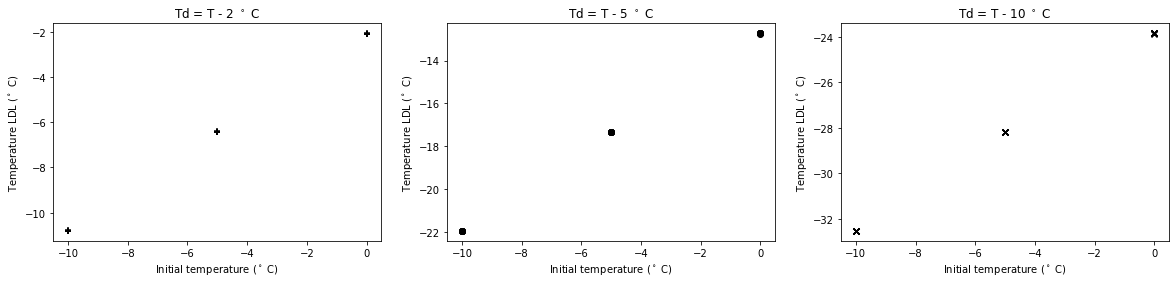

In [ ]:
# LDL
fig = plt.figure(figsize=(20, 4))

ax = fig.add_subplot(131)
for i,name in enumerate(functions_ice):
    t_ldl = (ldl(TTT, TTTd1, functions_ice[name]['fun'])[0]*units.K).to('degC')
    plt.scatter(TTT, t_ldl, color = 'black', marker = '+') 

plt.ylabel('Temperature LDL ($^\circ$ C)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 2 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(132)
for i,name in enumerate(functions_ice):
    t_ldl = (lcl(TTT, TTTd2, functions_ice[name]['fun'])[0]*units.K).to('degC')
    plt.scatter(TTT, t_ldl, color = 'black', marker = 'o') 

plt.ylabel('Temperature LDL ($^\circ$ C)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 5 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(133)
for i,name in enumerate(functions_ice):
    t_ldl = (lcl(TTT, TTTd3, functions_ice[name]['fun'])[0]*units.K).to('degC')
    plt.scatter(TTT, t_ldl, color = 'black', marker = 'x') 

plt.ylabel('Temperature LDL ($^\circ$ C)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 10 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

Text(0.5, 1.0, 'Td = T - 10 $^\\circ$ C')

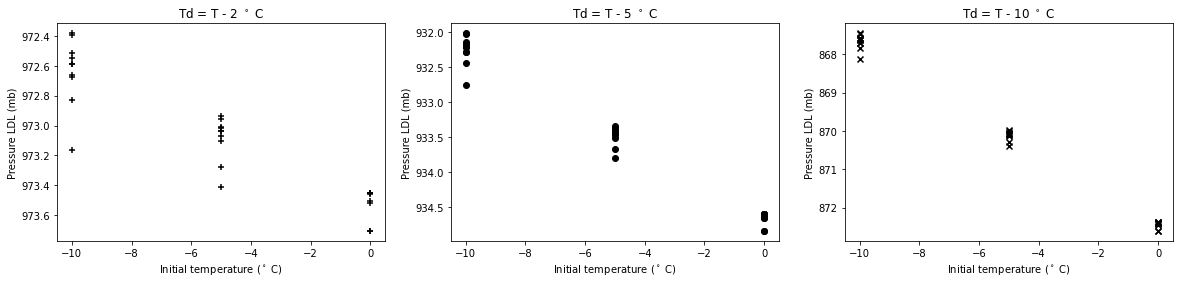

In [ ]:
# LDL
fig = plt.figure(figsize=(20, 4))

ax = fig.add_subplot(131)
for i,name in enumerate(functions):
    t_ldl = (ldl(TTT, TTTd1, functions[name]['fun'])[1]*units.mbar)
    plt.scatter(TTT, t_ldl, color = 'black', marker = '+') 

plt.gca().invert_yaxis()
plt.ylabel('Pressure LDL (mb)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 2 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(132)
for i,name in enumerate(functions):
    t_ldl = (ldl(TTT, TTTd2, functions[name]['fun'])[1]*units.mbar)
    plt.scatter(TTT, t_ldl, color = 'black', marker = 'o') 

plt.gca().invert_yaxis()
plt.ylabel('Pressure LDL (mb)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 5 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(133)
for i,name in enumerate(functions):
    t_ldl = (ldl(TTT, TTTd3, functions[name]['fun'])[1]*units.mbar)
    plt.scatter(TTT, t_ldl, color = 'black', marker = 'x') 

plt.gca().invert_yaxis()
plt.ylabel('Pressure LDL (mb)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 10 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

Text(0.5, 1.0, 'Td = T - 10 $^\\circ$ C')

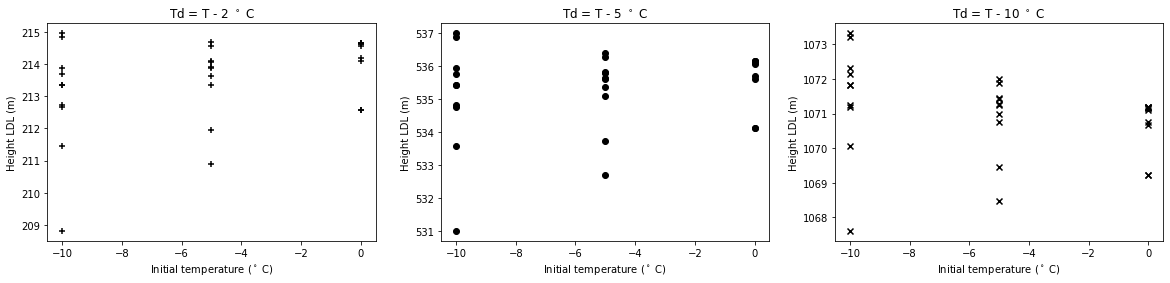

In [ ]:
# LDL
fig = plt.figure(figsize=(20, 4))

ax = fig.add_subplot(131)
for i,name in enumerate(functions):
    t_ldl = (ldl(TTT, TTTd1, functions[name]['fun'])[2]*units.m)
    plt.scatter(TTT, t_ldl, color = 'black', marker = '+') 

plt.ylabel('Height LDL (m)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 2 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(132)
for i,name in enumerate(functions):
    t_ldl = (ldl(TTT, TTTd2, functions[name]['fun'])[2]*units.m)
    plt.scatter(TTT, t_ldl, color = 'black', marker = 'o') 

plt.ylabel('Height LDL (m)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 5 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

ax = fig.add_subplot(133)
for i,name in enumerate(functions):
    t_ldl = (ldl(TTT, TTTd3, functions[name]['fun'])[2]*units.m)
    plt.scatter(TTT, t_ldl, color = 'black', marker = 'x') 

plt.ylabel('Height LDL (m)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Td = T - 10 $^\circ$ C')
# plt.legend(loc = 'lower right', ncol = 2)

(-11.0, 1.0)

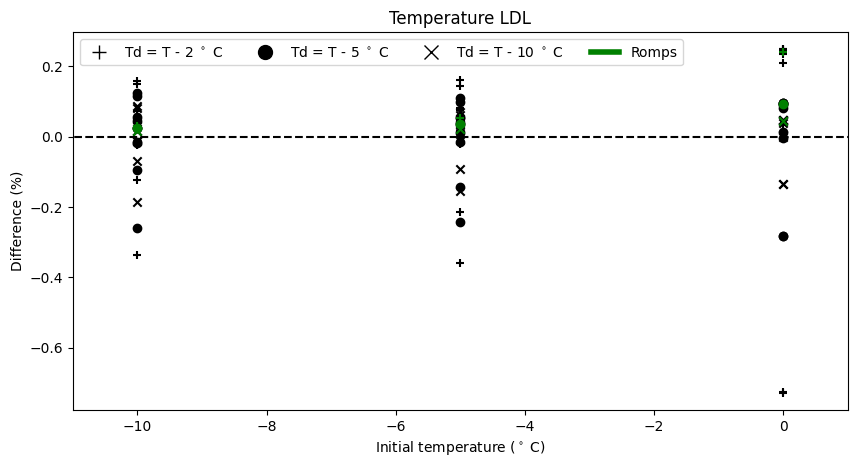

In [ ]:
# LDL
t_ldl1 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl1 = t_ldl1 + (ldl(TTT, TTTd1, functions[name]['fun'])[0]*units.K).to('degC').m
t_ldl1_ref = t_ldl1/len(functions)
t_ldl1_ref

t_ldl2 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl2 = t_ldl2 + (ldl(TTT, TTTd2, functions[name]['fun'])[0]*units.K).to('degC').m
t_ldl2_ref = t_ldl2/len(functions)
t_ldl2_ref

t_ldl3 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl3 = t_ldl3 + (ldl(TTT, TTTd3, functions[name]['fun'])[0]*units.K).to('degC').m
t_ldl3_ref = t_ldl3/len(functions)
t_ldl3_ref

# - the relative error (relative to the mean)
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)

# - choosing range where all formulation are valid

# - functions 
for i,name in enumerate(functions):
    t_ldl1 = (ldl(TTT, TTTd1, functions[name]['fun'])[0]*units.K).to('degC').m
    plt.scatter(TTT, 100*(t_ldl1 - t_ldl1_ref)/t_ldl1_ref, label = name, color='black',marker = '+') 
    t_ldl2 = (ldl(TTT, TTTd2, functions[name]['fun'])[0]*units.K).to('degC').m  
    plt.scatter(TTT, 100*(t_ldl2 - t_ldl2_ref)/t_ldl2_ref, label = name, color='black',marker = 'o')
    t_ldl3 = (ldl(TTT, TTTd3, functions[name]['fun'])[0]*units.K).to('degC').m
    plt.scatter(TTT, 100*(t_ldl3 - t_ldl3_ref)/t_ldl3_ref, label = name, color='black',marker = 'x')

# - Romps in green
t_ldl1 = (ldl(TTT, TTTd1, functions['Romps']['fun'])[0]*units.K).to('degC').m
plt.scatter(TTT, 100*(t_ldl1 - t_ldl1_ref)/t_ldl1_ref, color = 'green', marker = '+') 
t_ldl2 = (ldl(TTT, TTTd2, functions['Romps']['fun'])[0]*units.K).to('degC').m  
plt.scatter(TTT, 100*(t_ldl2 - t_ldl2_ref)/t_ldl2_ref, color = 'green', marker = 'o')
t_ldl3 = (ldl(TTT, TTTd3, functions['Romps']['fun'])[0]*units.K).to('degC').m
plt.scatter(TTT, 100*(t_ldl3 - t_ldl3_ref)/t_ldl3_ref, color = 'green', marker = 'x')


import matplotlib.lines as mlines
plus = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=10, label='Td = T - 2 $^\circ$ C')
circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Td = T - 5 $^\circ$ C')
cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=10, label='Td = T - 10 $^\circ$ C')
r = mlines.Line2D([], [], color='green', linewidth='4',
                          markersize=10, label='Romps')

plt.legend(handles=[plus,circle,cross,r],ncol = 4)

plt.ylabel('Difference (%)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Temperature LDL')
plt.hlines(0,-12,2, linestyle = 'dashed')
plt.xlim(-11,1)
# plt.ylim(-3,0)

(-11.0, 1.0)

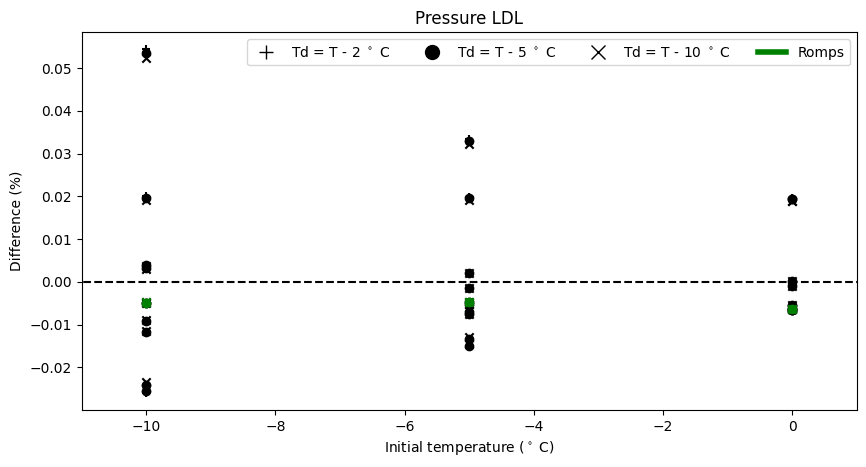

In [ ]:
# LDL
t_ldl1 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl1 = t_ldl1 + (ldl(TTT, TTTd1, functions[name]['fun'])[1]*units.mbar).m
t_ldl1_ref = t_ldl1/len(functions)
t_ldl1_ref

t_ldl2 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl2 = t_ldl2 + (ldl(TTT, TTTd2, functions[name]['fun'])[1]*units.mbar).m
t_ldl2_ref = t_ldl2/len(functions)
t_ldl2_ref

t_ldl3 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl3 = t_ldl3 + (ldl(TTT, TTTd3, functions[name]['fun'])[1]*units.mbar).m
t_ldl3_ref = t_ldl3/len(functions)
t_ldl3_ref

# - the relative error (relative to the mean)
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)

# - choosing range where all formulation are valid

# - functions 
for i,name in enumerate(functions):
    t_ldl1 = (ldl(TTT, TTTd1, functions[name]['fun'])[1]*units.mbar).m
    plt.scatter(TTT, 100*(t_ldl1 - t_ldl1_ref)/t_ldl1_ref, label = name, color = 'black', marker = '+') 
    t_ldl2 = (ldl(TTT, TTTd2, functions[name]['fun'])[1]*units.mbar).m  
    plt.scatter(TTT, 100*(t_ldl2 - t_ldl2_ref)/t_ldl2_ref, label = name, color = 'black', marker = 'o')
    t_ldl3 = (ldl(TTT, TTTd3, functions[name]['fun'])[1]*units.mbar).m
    plt.scatter(TTT, 100*(t_ldl3 - t_ldl3_ref)/t_ldl3_ref, label = name, color = 'black', marker = 'x')

# - Romps in green
t_ldl1 = (ldl(TTT, TTTd1, functions['Romps']['fun'])[1]*units.mbar).m
plt.scatter(TTT, 100*(t_ldl1 - t_ldl1_ref)/t_ldl1_ref, color = 'green', marker = '+') 
t_ldl2 = (ldl(TTT, TTTd2, functions['Romps']['fun'])[1]*units.mbar).m  
plt.scatter(TTT, 100*(t_ldl2 - t_ldl2_ref)/t_ldl2_ref, color = 'green', marker = 'o')
t_ldl3 = (ldl(TTT, TTTd3, functions['Romps']['fun'])[1]*units.mbar).m
plt.scatter(TTT, 100*(t_ldl3 - t_ldl3_ref)/t_ldl3_ref, color = 'green', marker = 'x')


import matplotlib.lines as mlines
plus = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=10, label='Td = T - 2 $^\circ$ C')
circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Td = T - 5 $^\circ$ C')
cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=10, label='Td = T - 10 $^\circ$ C')
r = mlines.Line2D([], [], color='green', linewidth='4',
                          markersize=10, label='Romps')

plt.legend(handles=[plus,circle,cross,r],ncol = 4)

plt.ylabel('Difference (%)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Pressure LDL')
plt.hlines(0,-12,2, linestyle = 'dashed')
plt.xlim(-11,1)
# plt.ylim(-3,0)

(-11.0, 1.0)

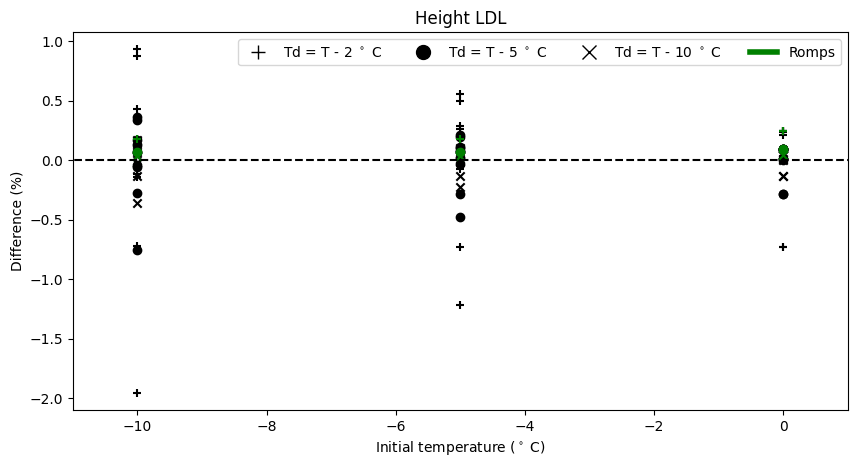

In [ ]:
# LDL
t_ldl1 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl1 = t_ldl1 + (ldl(TTT, TTTd1, functions[name]['fun'])[2]*units.m).m
t_ldl1_ref = t_ldl1/len(functions)
t_ldl1_ref

t_ldl2 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl2 = t_ldl2 + (ldl(TTT, TTTd2, functions[name]['fun'])[2]*units.m).m
t_ldl2_ref = t_ldl2/len(functions)
t_ldl2_ref

t_ldl3 = np.zeros(len(TTT)) 
for i,name in enumerate(functions):
    t_ldl3 = t_ldl3 + (ldl(TTT, TTTd3, functions[name]['fun'])[2]*units.m).m
t_ldl3_ref = t_ldl3/len(functions)
t_ldl3_ref

# - the relative error (relative to the mean)
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)

# - choosing range where all formulation are valid

# - functions 
for i,name in enumerate(functions):
    t_ldl1 = (ldl(TTT, TTTd1, functions[name]['fun'])[2]*units.m).m
    plt.scatter(TTT, 100*(t_ldl1 - t_ldl1_ref)/t_ldl1_ref, label = name, color = 'black', marker = '+') 
    t_ldl2 = (ldl(TTT, TTTd2, functions[name]['fun'])[2]*units.m).m  
    plt.scatter(TTT, 100*(t_ldl2 - t_ldl2_ref)/t_ldl2_ref, label = name, color = 'black', marker = 'o')
    t_ldl3 = (ldl(TTT, TTTd3, functions[name]['fun'])[2]*units.m).m
    plt.scatter(TTT, 100*(t_ldl3 - t_ldl3_ref)/t_ldl3_ref, label = name, color = 'black', marker = 'x')

# - Romps in green
t_ldl1 = (ldl(TTT, TTTd1, functions['Romps']['fun'])[2]*units.m).m
plt.scatter(TTT, 100*(t_ldl1 - t_ldl1_ref)/t_ldl1_ref, color = 'green', marker = '+') 
t_ldl2 = (ldl(TTT, TTTd2, functions['Romps']['fun'])[2]*units.m).m  
plt.scatter(TTT, 100*(t_ldl2 - t_ldl2_ref)/t_ldl2_ref, color = 'green', marker = 'o')
t_ldl3 = (ldl(TTT, TTTd3, functions['Romps']['fun'])[2]*units.m).m
plt.scatter(TTT, 100*(t_ldl3 - t_ldl3_ref)/t_ldl3_ref, color = 'green', marker = 'x')

import matplotlib.lines as mlines
plus = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=10, label='Td = T - 2 $^\circ$ C')
circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Td = T - 5 $^\circ$ C')
cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=10, label='Td = T - 10 $^\circ$ C')
r = mlines.Line2D([], [], color='green', linewidth='4',
                          markersize=10, label='Romps')

plt.legend(handles=[plus,circle,cross,r],ncol = 4)

plt.ylabel('Difference (%)')
plt.xlabel('Initial temperature ($^\circ$ C)')
plt.title('Height LDL')
plt.hlines(0,-12,2, linestyle = 'dashed')
plt.xlim(-11,1)
# plt.ylim(-3,0)